# This is the data analysis test workbook

Goals include setting up data tables for each type of data

Plotting a line graph of the data

Allowing the person looking at the data to choose which county or country they wish to look at

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
import webbrowser
website ='https://datahub.io/core/covid-19#data'
webbrowser.open(website)

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path

'C:\\Users\\User\\Documents\\GitHub\\COVID_Bubble_Estimator\\data'

In [3]:
#Finds all the files in the directory
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break

In [4]:
f

['CDC_Cases_and_deaths.csv',
 'countries-aggregated.csv',
 'key-countries-pivoted.csv',
 'Opendatasoft_uscountyboundries.xlsx',
 'reference.csv',
 'state_abriv.csv',
 'state_neighbors.csv',
 'time-series-19-covid-combined.csv',
 'us_confirmed.csv',
 'us_deaths.csv',
 'us_simplified.csv',
 'worldwide-aggregate.csv']

In [5]:
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('_csv.csv'):# Some of the files were _csv.csv  Lets get rid of them
        continue
    
    elif Type.endswith('.csv'): 
            files.append(Type)

In [6]:
files

['CDC_Cases_and_deaths.csv',
 'countries-aggregated.csv',
 'key-countries-pivoted.csv',
 'reference.csv',
 'state_abriv.csv',
 'state_neighbors.csv',
 'time-series-19-covid-combined.csv',
 'us_confirmed.csv',
 'us_deaths.csv',
 'us_simplified.csv',
 'worldwide-aggregate.csv']

In [7]:
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

In [8]:
dfs_names

['CDC_Cases_and_deaths',
 'countries-aggregated',
 'key-countries-pivoted',
 'reference',
 'state_abriv',
 'state_neighbors',
 'time-series-19-covid-combined',
 'us_confirmed',
 'us_deaths',
 'us_simplified',
 'worldwide-aggregate']

In [9]:
# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead

dfs.keys()

dict_keys(['CDC_Cases_and_deaths', 'countries-aggregated', 'key-countries-pivoted', 'reference', 'state_abriv', 'state_neighbors', 'time-series-19-covid-combined', 'us_confirmed', 'us_deaths', 'us_simplified', 'worldwide-aggregate'])

In [10]:
# Pretty neat, I just call the title of the cvs file and I now have the DataFrame
dfs["us_confirmed"]

,Admin2,Date,Case,Country/Region,Province/State
index,,,,,
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming


In [11]:
dfs["us_confirmed"].dtypes

Admin2                    object
Date              datetime64[ns]
Case                       int64
Country/Region            object
Province/State            object
dtype: object

In [12]:
for n in dfs.keys():
    print (n,'\n',dfs[n].dtypes)
    print()

CDC_Cases_and_deaths 
 state              object
tot_cases          object
conf_cases        float64
prob_cases        float64
new_case          float64
pnew_case         float64
tot_death           int64
new_death         float64
pnew_death        float64
created_at         object
consent_cases      object
consent_deaths     object
conf_death        float64
prob_death        float64
dtype: object

countries-aggregated 
 Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

key-countries-pivoted 
 Date              datetime64[ns]
China                     object
US                         int64
United_Kingdom             int64
Italy                      int64
France                     int64
Germany                    int64
Spain                      int64
Iran                       int64
dtype: object

reference 
 UID                object
iso2               object
iso3               o

And there we go.  Indexed and date time objects alread set with the import.

I wonder how much of these databases I can combine to get a bigger picture.   That is something for another time I think

#### Tkinter makes a dropdown menue to select options

Maybe I can use this to select the state that we are looking at?

In [13]:
from tkinter import *

ws = Tk()
ws.title('States')
ws.geometry('400x300')
ws.config(bg='#F2B90C')

def display_selected(choice):
    choice = variable.get()
    print(choice)

states=list(dfs["us_confirmed"]["Province/State"].unique())

# setting variable for Integers
variable = StringVar()
variable.set(states[3])

# creating widget
dropdown = OptionMenu(
    ws,
    variable,
    *states,
    command=display_selected
)

# positioning widget
dropdown.pack(expand=True)

# infinite loop 
ws.mainloop()

Lets table this idea for a while.  But I could use it for selecting which countries we will be comparing.

In [14]:
# Get the US confirmed cases and make a DataFrame from them
us_confirmed = dfs["us_confirmed"].copy()

In [15]:
# Gets the data from California only
Cal=us_confirmed[us_confirmed['Province/State']=='California']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe=Cal.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,210747,118,7008,32088,5936,3824,160239,4339,24525,197313,...,110937,18292,12121,1158,105633,9861,6153,151650,31713,13876
2022-01-20,210751,119,7008,32091,5936,3824,160241,4339,24525,197314,...,113759,18292,12121,1158,105633,9861,5198,151651,31713,13876
2022-01-21,214939,119,7064,32484,6006,3840,162809,4368,24845,201080,...,115652,18472,12228,1167,107113,9979,6354,155655,32382,14050


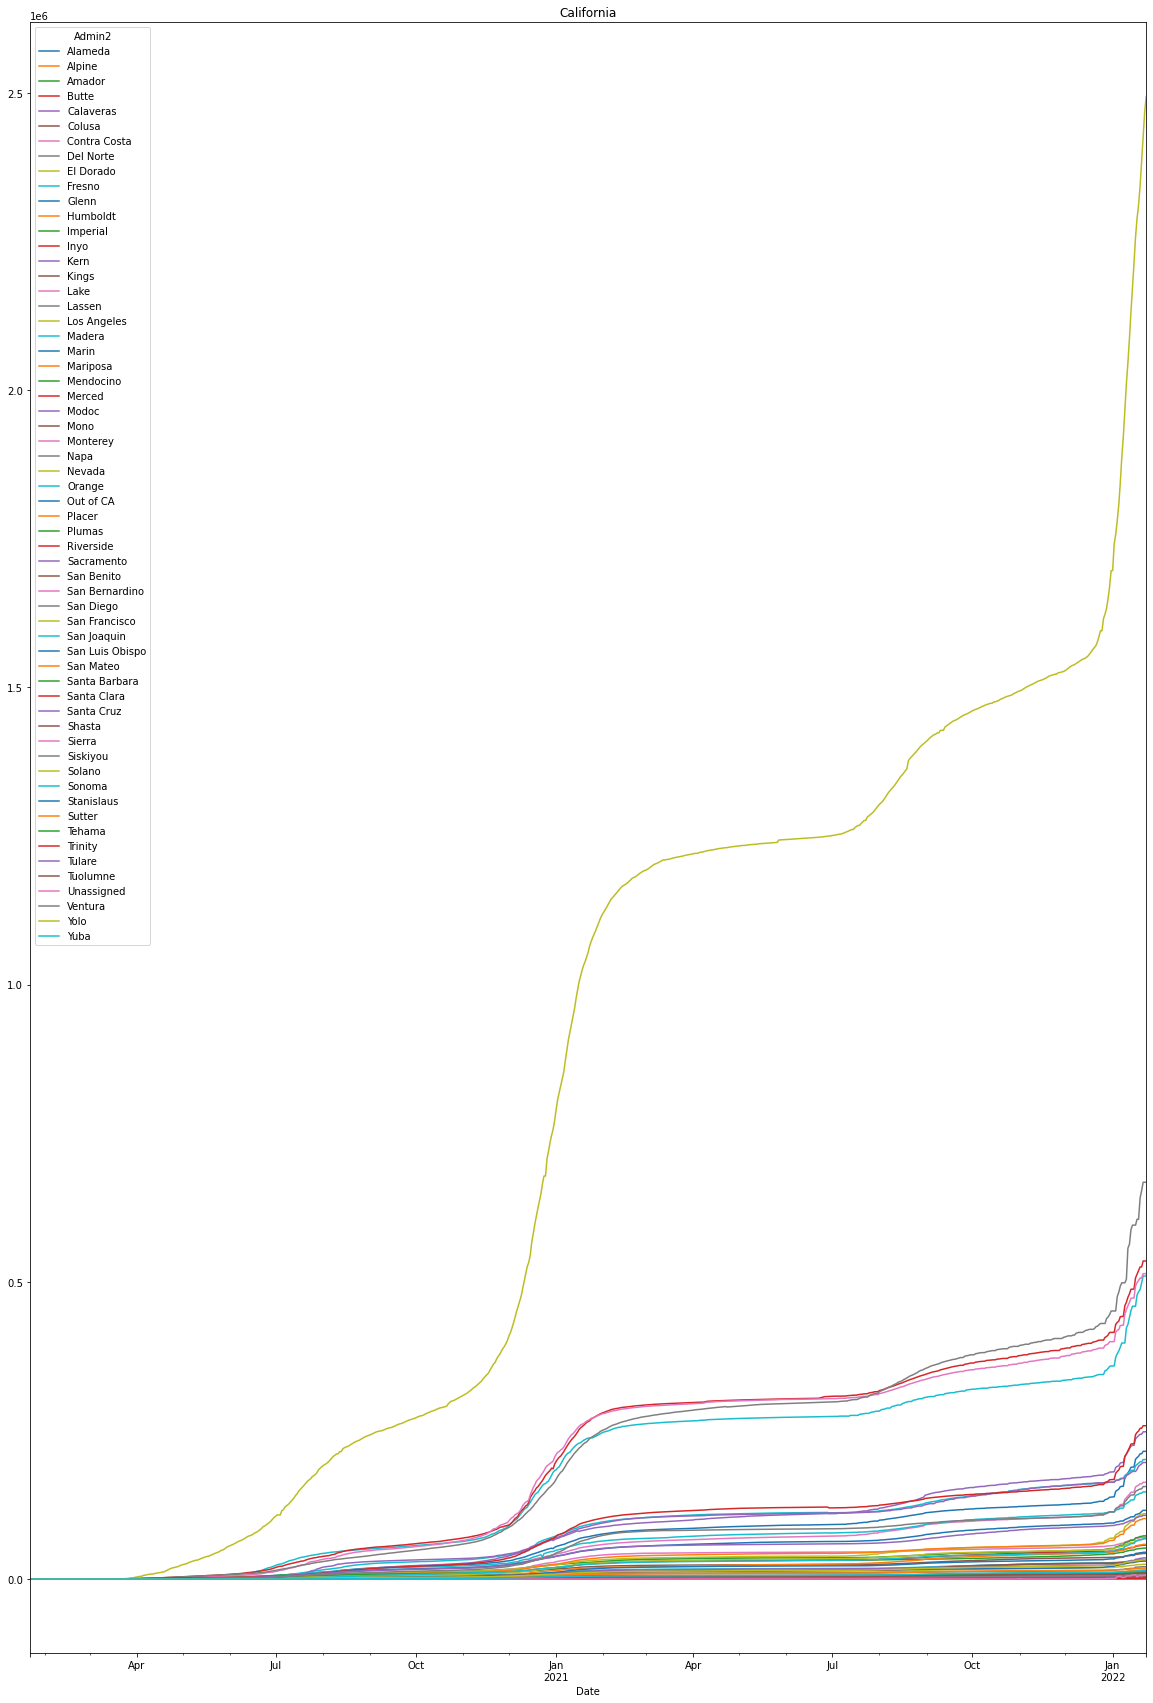

In [89]:
dframe.plot(title=('California'),figsize=(20,30))
plt.show()

In [90]:
dframe.describe()

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,...,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,60842.152797,53.836289,2442.053206,10174.124147,1613.555252,1502.386085,48322.328786,1220.331514,7512.743520,73594.620737,...,41747.739427,6491.267394,3965.335607,336.976808,39856.060027,2951.302865,197.937244,51926.725784,9755.301501,4402.421555
std,50409.577676,44.408596,2227.849231,9273.610839,1598.259197,1228.856630,40732.767860,1367.066898,7003.451382,58549.151892,...,33479.115843,5548.406099,3708.721617,350.311061,31369.731345,2855.023250,875.364334,43600.995319,8371.571187,3986.188410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9963.000000,2.000000,61.000000,737.000000,102.000000,242.000000,6642.000000,66.000000,491.000000,12317.000000,...,7614.000000,570.000000,160.000000,8.000000,7923.000000,95.000000,0.000000,6326.000000,1282.000000,297.000000
50%,71260.000000,73.000000,3066.000000,11156.000000,1682.000000,1860.000000,54838.000000,856.000000,8438.000000,91602.000000,...,48171.000000,7959.000000,4451.000000,314.000000,48765.000000,3408.000000,0.000000,66822.000000,11158.000000,4853.000000
75%,95429.000000,89.000000,3850.000000,15010.000000,2283.000000,2339.000000,75209.000000,1512.000000,11636.000000,112901.000000,...,64281.000000,9996.000000,5784.000000,444.000000,59911.000000,4258.000000,66.000000,86148.000000,15016.000000,6590.000000
max,214939.000000,119.000000,7064.000000,32484.000000,6006.000000,3840.000000,162809.000000,4368.000000,24845.000000,201080.000000,...,115652.000000,18472.000000,12228.000000,1167.000000,107113.000000,9979.000000,7153.000000,155655.000000,32382.000000,14050.000000


In [16]:
dframe.columns

Index(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Out of CA', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra',
       'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unassigned', 'Ventura', 'Yolo',
       'Yuba'],
      dtype='object', name='Admin2')

<AxesSubplot:title={'center':'California'}, ylabel='Frequency'>

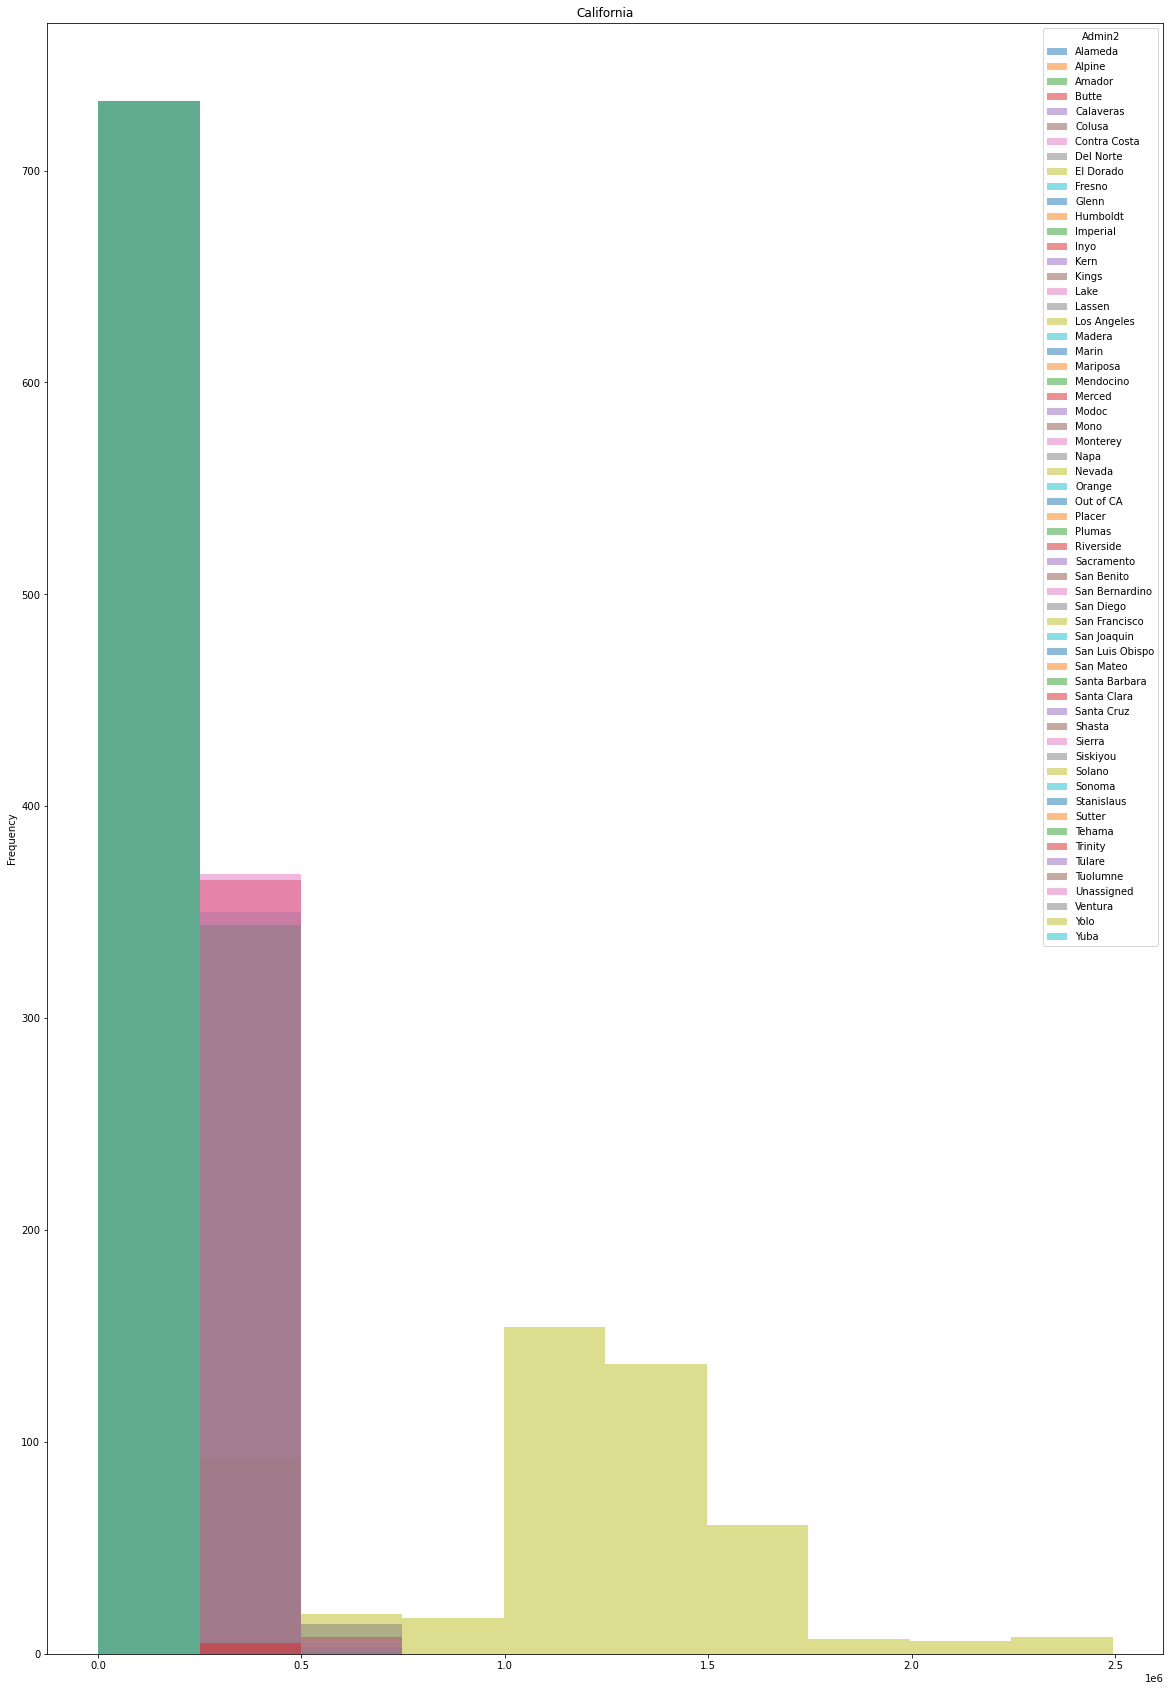

In [17]:
dframe.plot.hist(title=('California'),figsize=(20,30), alpha=0.5)

**So everyone has a bunch of days where ther are 0 outbdreaks, but only a few have 0.5x10^6 or 500,000 cases.  Only two counties have more than a million cases.** 

In [18]:
California_Counties=[]
for i in dframe.columns:
    California_Counties.append(dframe[i])
dframe_Cal=DataFrame(California_Counties)    

In [19]:
dframe_Cal

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alameda,0,0,0,0,0,0,0,0,0,0,...,188451,188518,201500,204284,206736,210747,210751,214939,214939,214939
Alpine,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,119,119,119,119
Amador,0,0,0,0,0,0,0,0,0,0,...,6651,6651,6835,6859,6910,7008,7008,7064,7064,7064
Butte,0,0,0,0,0,0,0,0,0,0,...,30209,30223,31355,31551,31763,32088,32091,32484,32484,32484
Calaveras,0,0,0,0,0,0,0,0,0,0,...,5424,5426,5705,5754,5855,5936,5936,6006,6006,6006
Colusa,0,0,0,0,0,0,0,0,0,0,...,3682,3682,3772,3791,3789,3824,3824,3840,3840,3840
Contra Costa,0,0,0,0,0,0,0,0,0,0,...,146207,146257,154961,156689,158142,160239,160241,162809,162809,162809
Del Norte,0,0,0,0,0,0,0,0,0,0,...,4155,4157,4272,4308,4328,4339,4339,4368,4368,4368
El Dorado,0,0,0,0,0,0,0,0,0,0,...,22949,22963,23847,24102,24279,24525,24525,24845,24845,24845
Fresno,0,0,0,0,0,0,0,0,0,0,...,182959,182992,190467,192746,194709,197313,197314,201080,201080,201080


<AxesSubplot:>

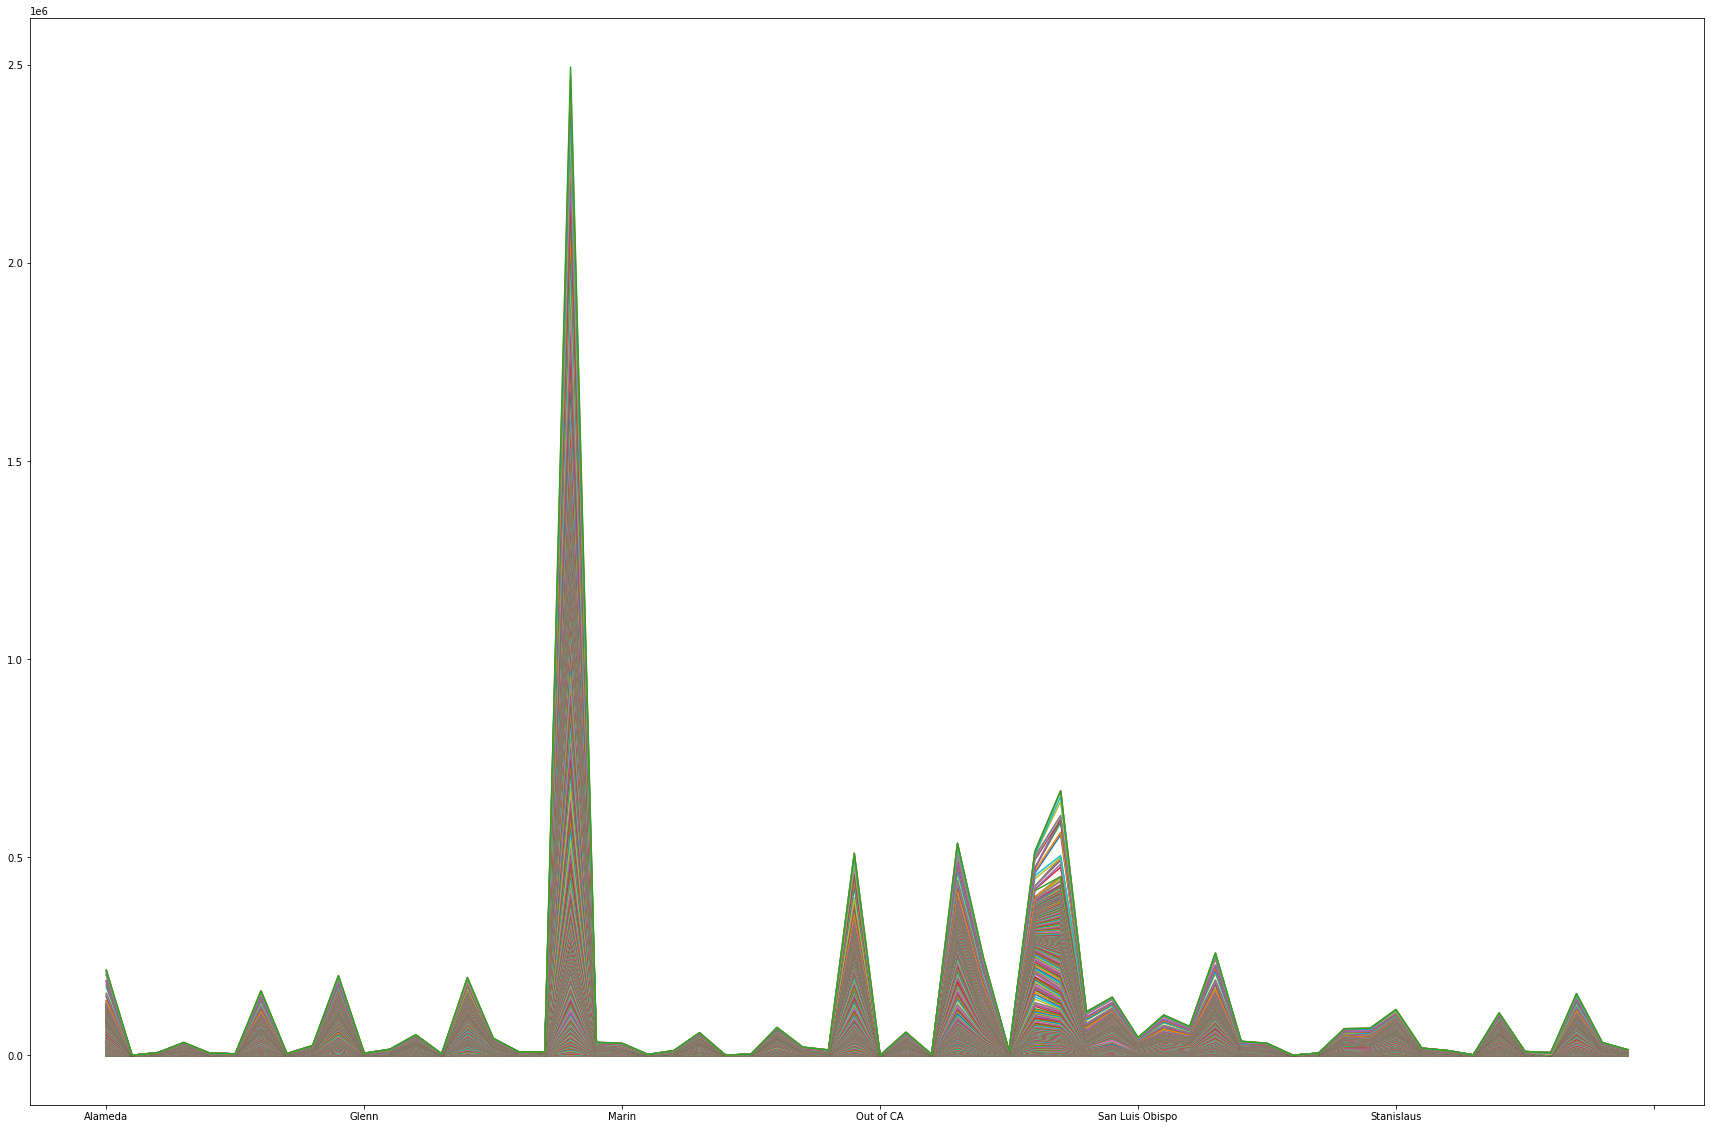

In [20]:
dframe_Cal.plot(figsize=(30,20),legend=False)

<AxesSubplot:>

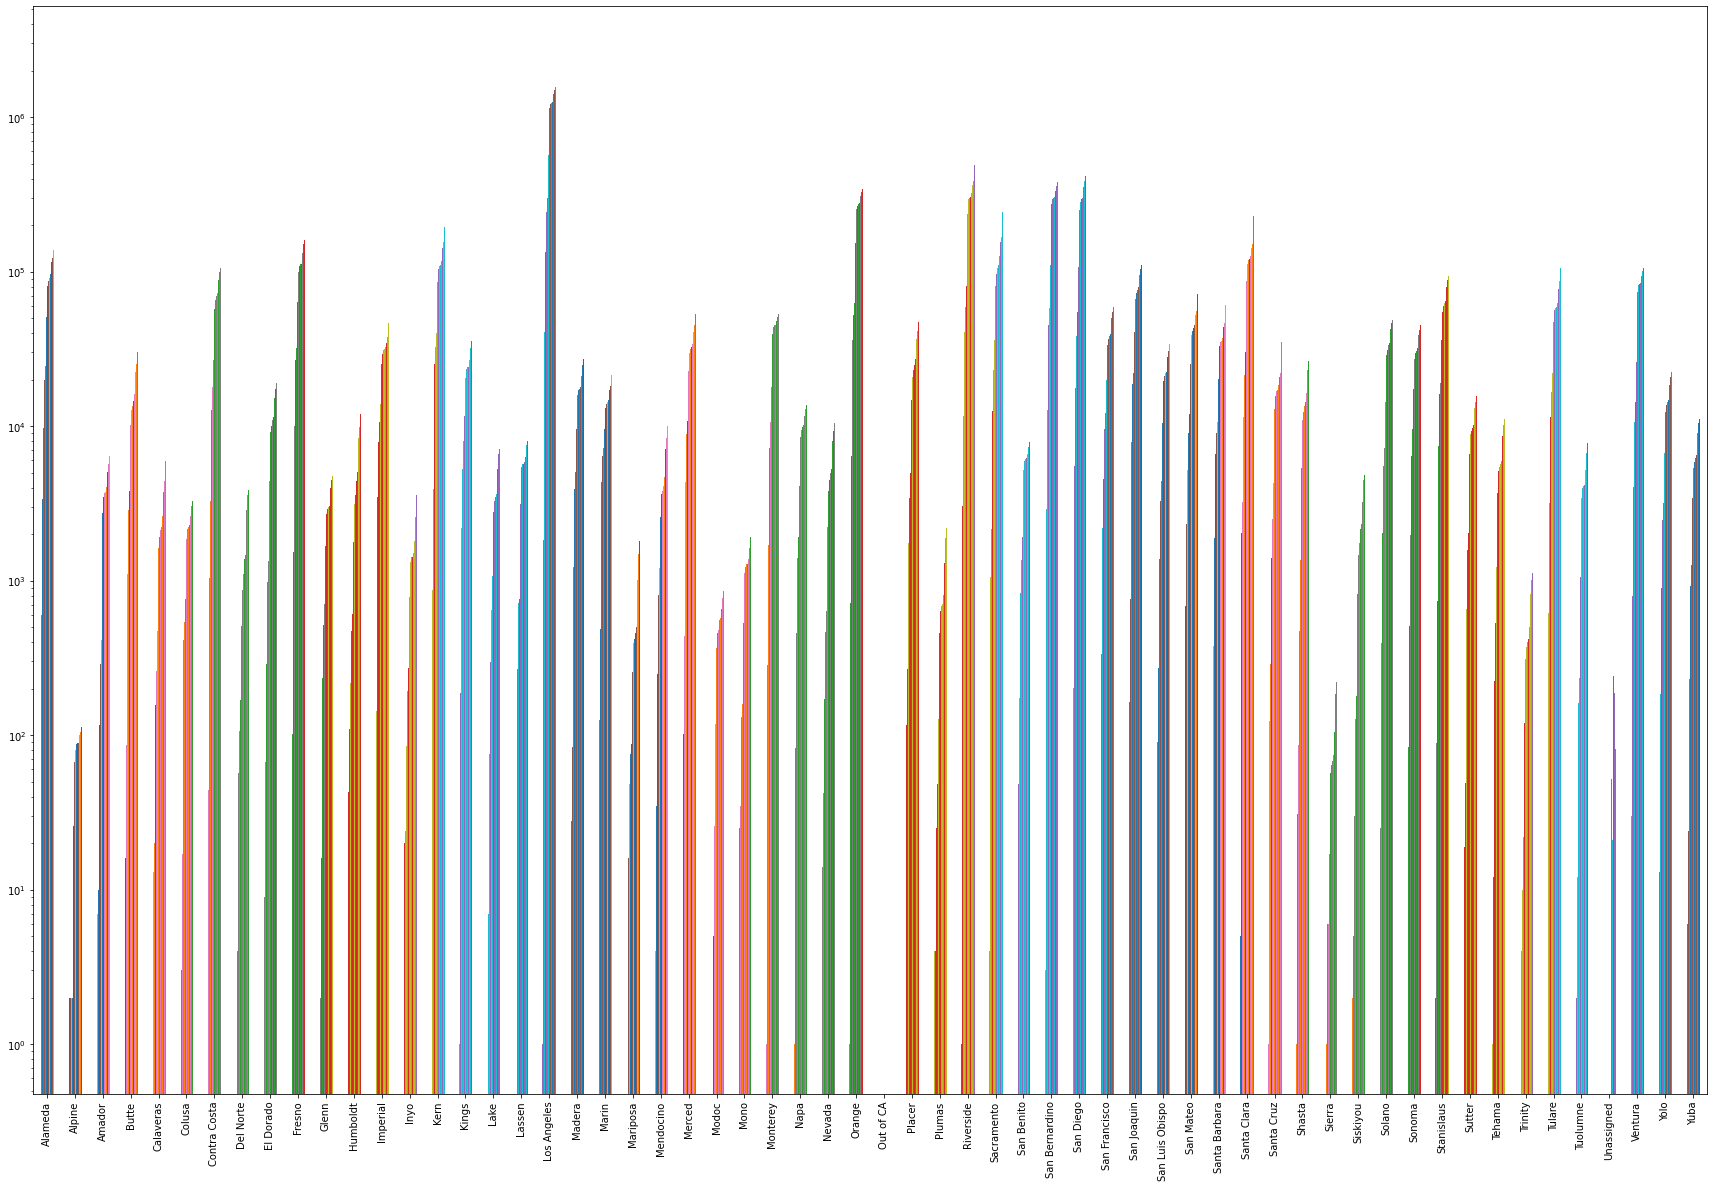

In [96]:
dframe_Cal.plot.bar(figsize=(30,20),legend=False, logy=True)

**Cases in CA are as follows**

LA is the worst by a factor of almost four!

Second tier would be Riverside, San Diego, San Bernadino and Orange county.  (high populations in SoCal)

Alameda, Conta Costa and Santa Clara along with Fresno are in the third tier (high populations in NorCal)

I should look at this per capita and see how it works via population density.  I'm pretty sure LA county is the largest in the state so no surprise.  SF is a small but dense population, that could be why it's so low, also SF has had very strict policies and good general adherance to them.

In [21]:
# Lets make a funciton that will do this for any state
def State_by_county(df,state):
    ''' This function will take a database and make a data frame of the state cases per county by date'''
    State=df[df['Province/State']==state]
    # Indexes the data by Admin2 (aka cities) and Dates
    #This unstacks the cities into their own hirerarchy
    dframe=State.set_index(['Admin2','Date']).unstack('Admin2')['Case']
    Counties=[]
    for i in dframe.columns:
        Counties.append(dframe[i])
    return DataFrame(Counties)

In [22]:
Cal=State_by_county(us_confirmed,'California')
Cal

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alameda,0,0,0,0,0,0,0,0,0,0,...,188451,188518,201500,204284,206736,210747,210751,214939,214939,214939
Alpine,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,119,119,119,119
Amador,0,0,0,0,0,0,0,0,0,0,...,6651,6651,6835,6859,6910,7008,7008,7064,7064,7064
Butte,0,0,0,0,0,0,0,0,0,0,...,30209,30223,31355,31551,31763,32088,32091,32484,32484,32484
Calaveras,0,0,0,0,0,0,0,0,0,0,...,5424,5426,5705,5754,5855,5936,5936,6006,6006,6006
Colusa,0,0,0,0,0,0,0,0,0,0,...,3682,3682,3772,3791,3789,3824,3824,3840,3840,3840
Contra Costa,0,0,0,0,0,0,0,0,0,0,...,146207,146257,154961,156689,158142,160239,160241,162809,162809,162809
Del Norte,0,0,0,0,0,0,0,0,0,0,...,4155,4157,4272,4308,4328,4339,4339,4368,4368,4368
El Dorado,0,0,0,0,0,0,0,0,0,0,...,22949,22963,23847,24102,24279,24525,24525,24845,24845,24845
Fresno,0,0,0,0,0,0,0,0,0,0,...,182959,182992,190467,192746,194709,197313,197314,201080,201080,201080


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

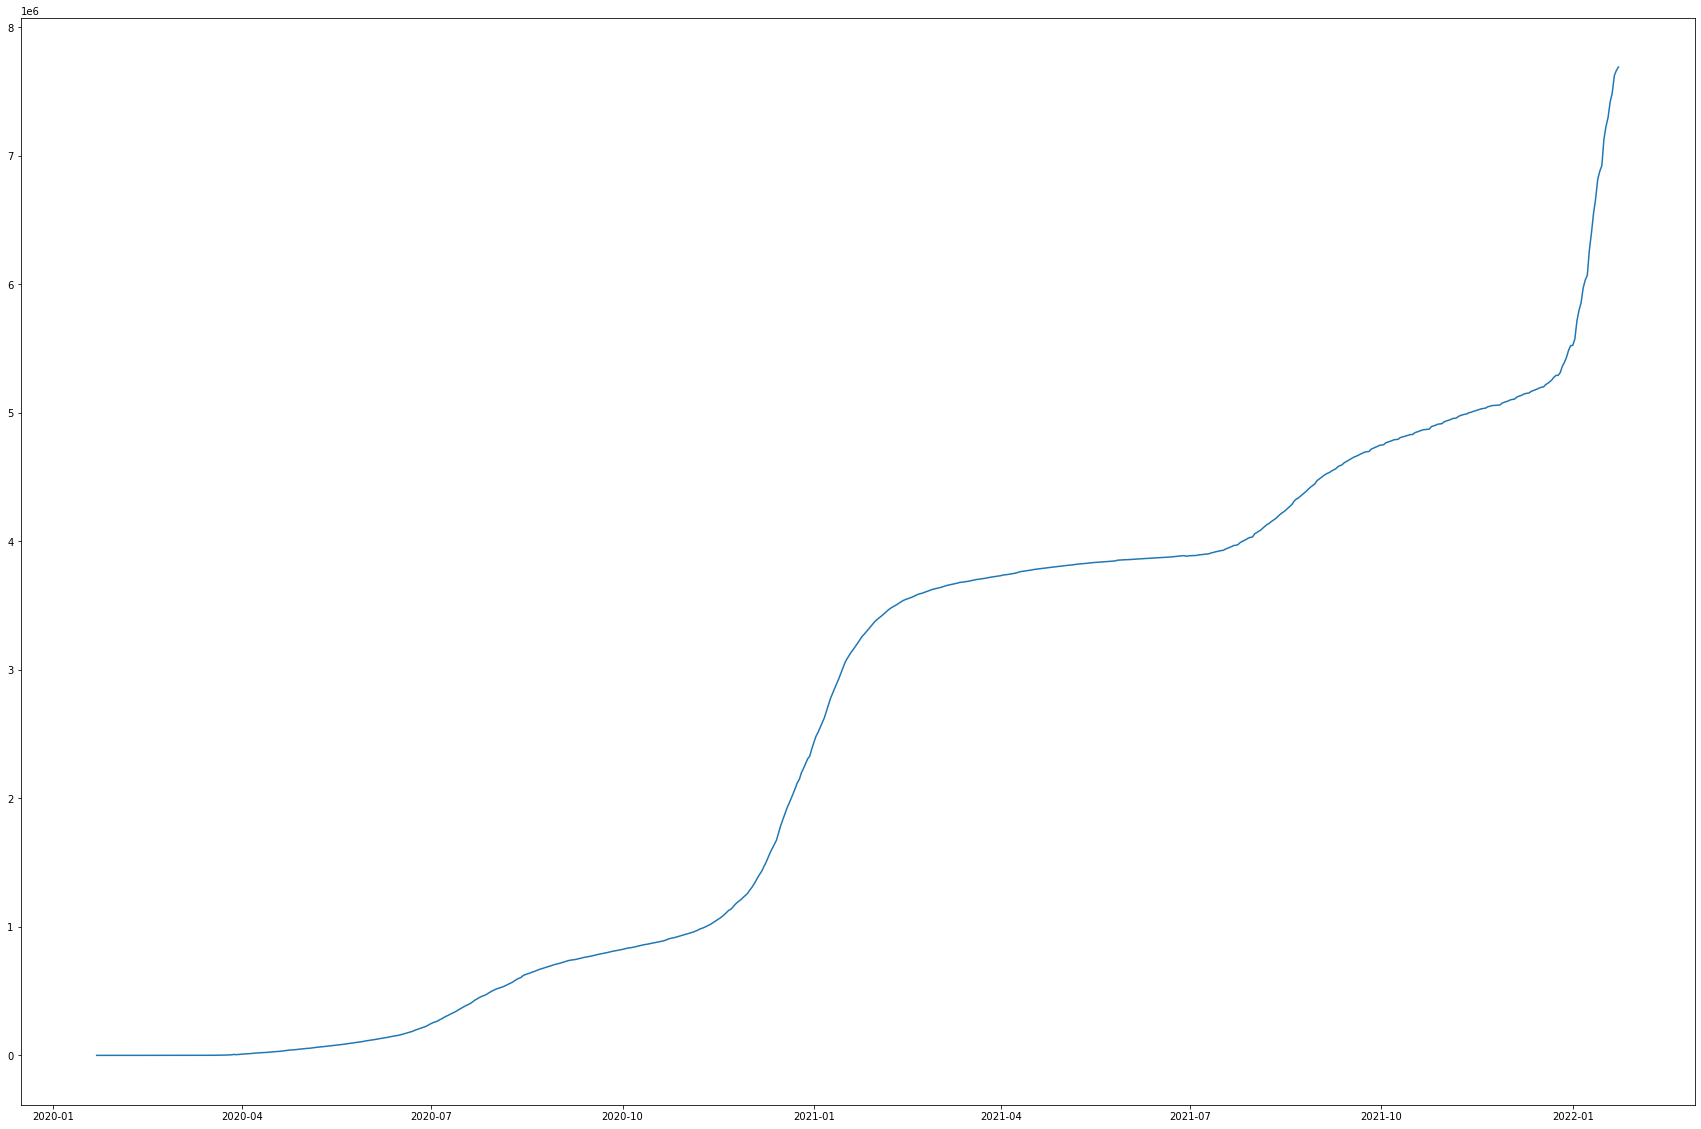

In [24]:
plt.figure(figsize=(30,20))
plt.plot(dframe_Cal.sum())

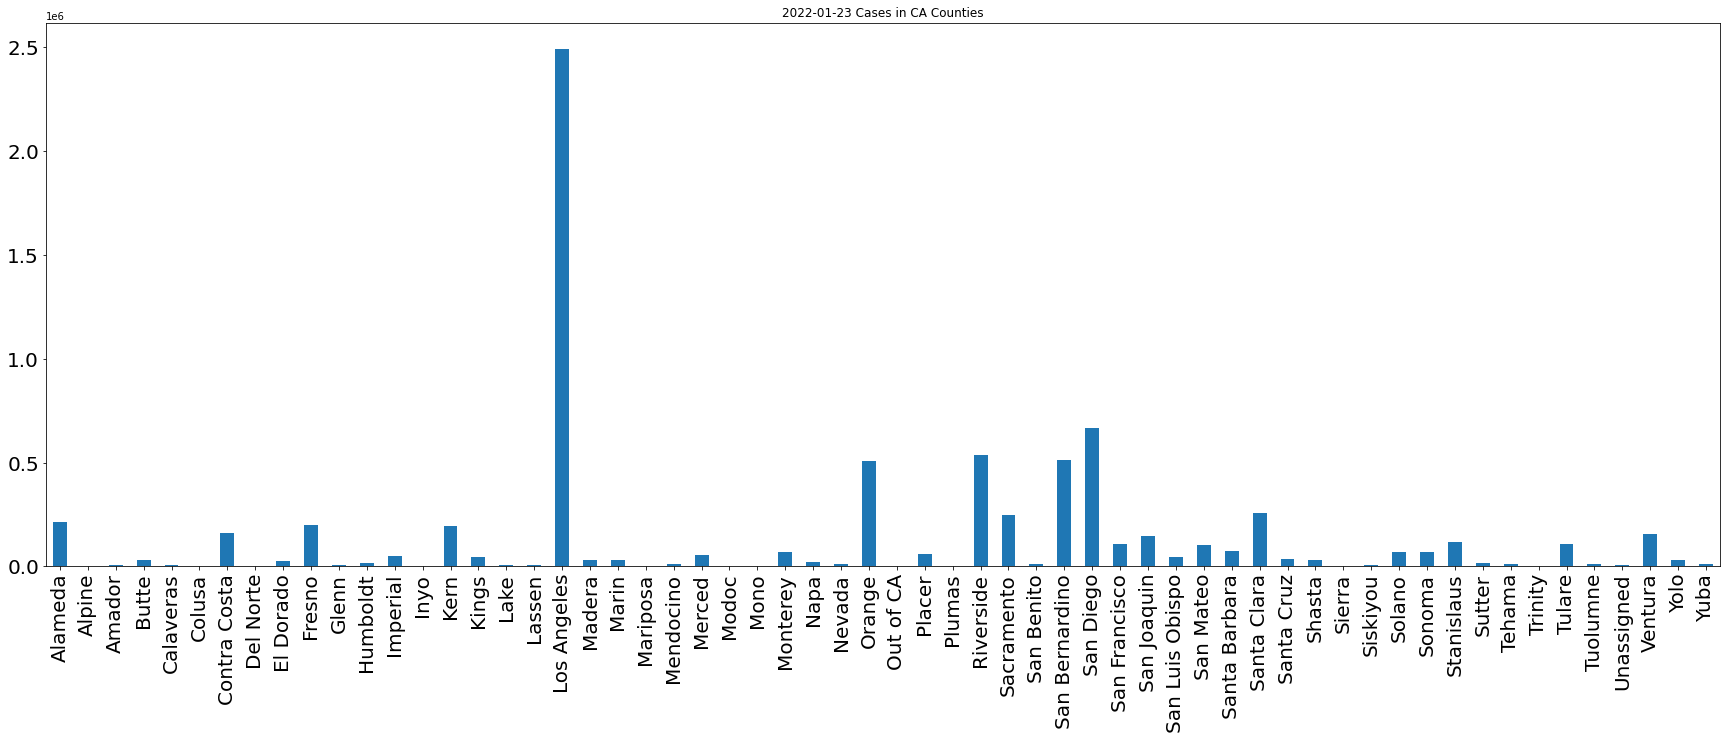

In [25]:
fig_1=dframe_Cal['2022-01-23'].plot.bar(title='2022-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

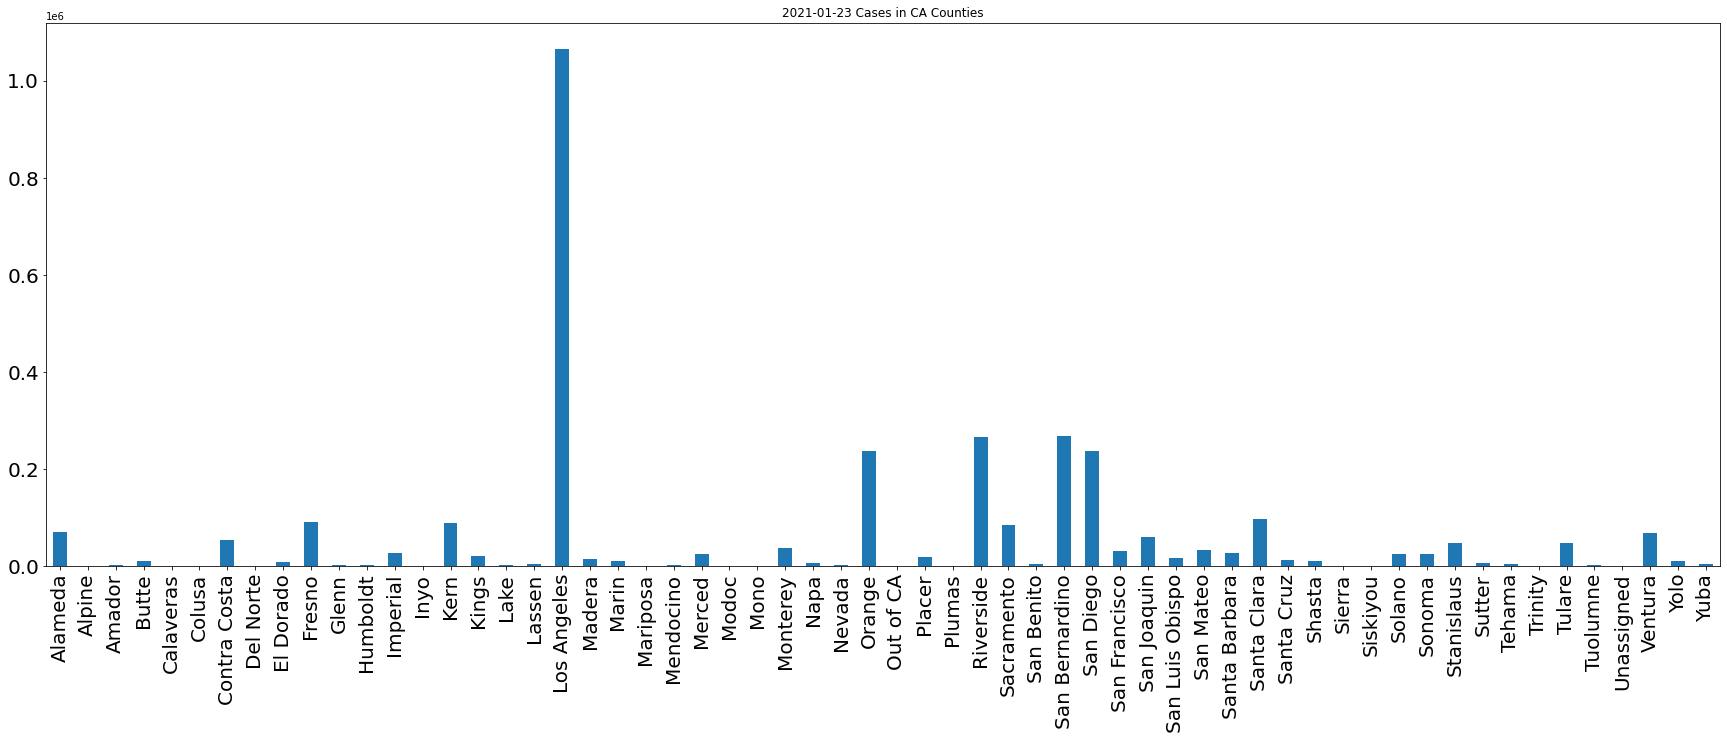

In [26]:
fig_2=dframe_Cal['2021-01-23'].plot.bar(title='2021-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

<AxesSubplot:title={'center':'Diff 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

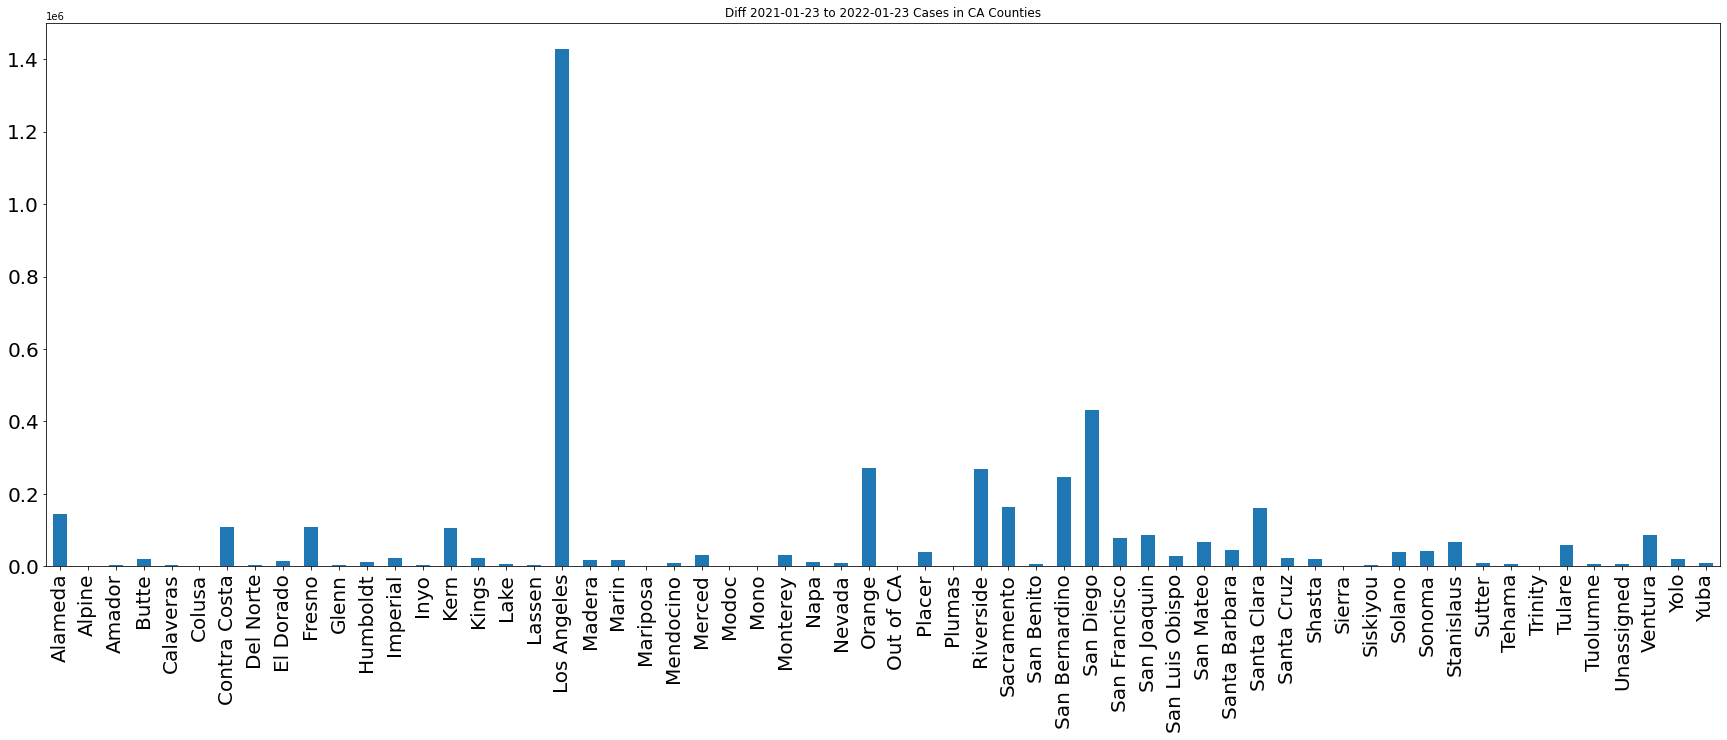

In [27]:
fig2=dframe_Cal['2022-01-23']-dframe_Cal['2021-01-23']
DataFrame(fig2).plot.bar(title='Diff 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

<AxesSubplot:title={'center':'Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

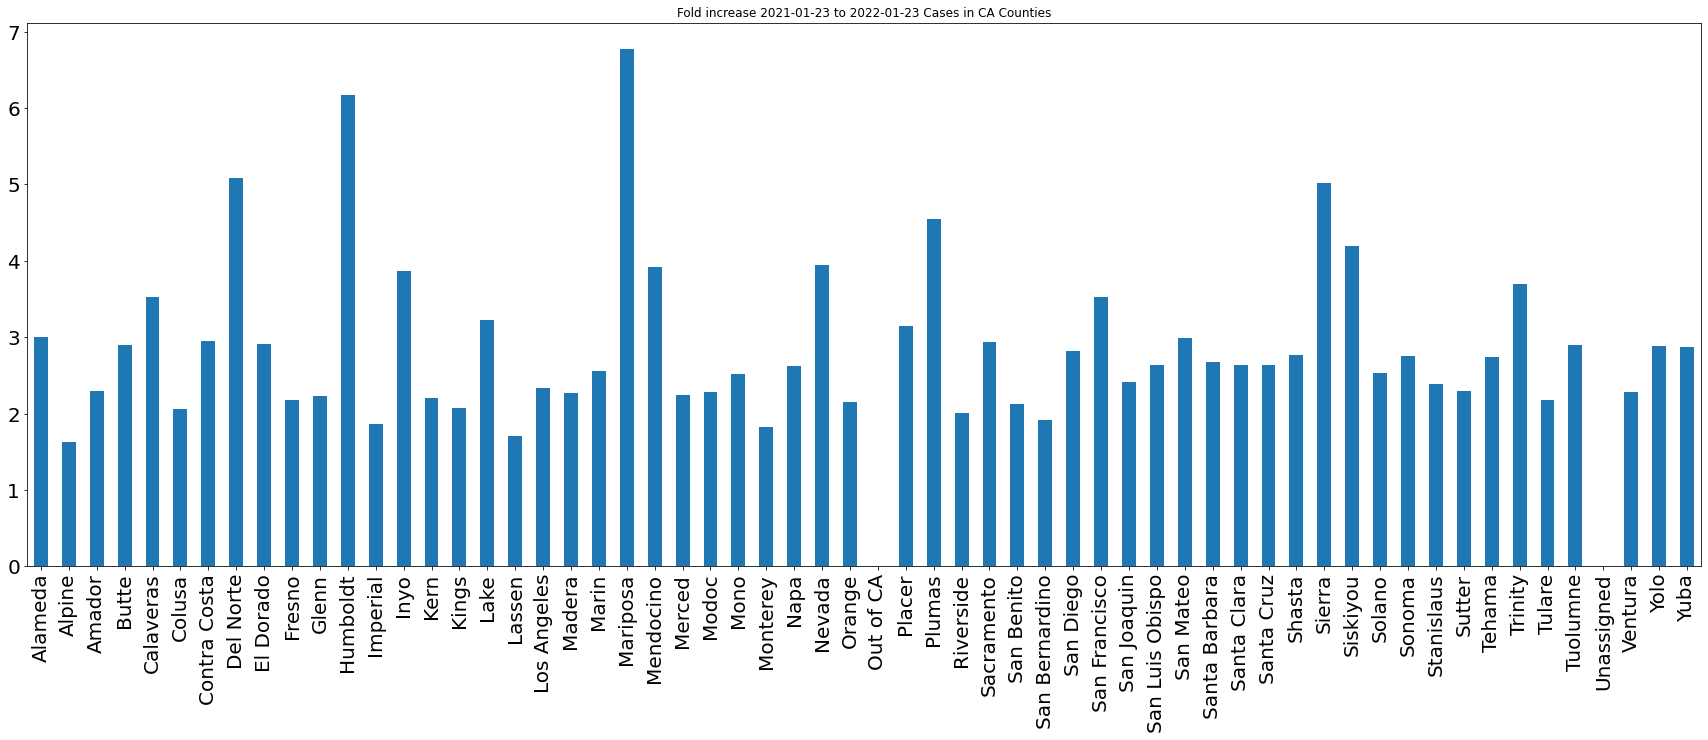

In [28]:
fig3=dframe_Cal['2022-01-23']/dframe_Cal['2021-01-23']
DataFrame(fig3).plot.bar(title='Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

In [29]:
states = list(us_confirmed['Province/State'].unique())
states

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [30]:
States_confirmed=[]
for state in states:
    States_confirmed.append (us_confirmed[us_confirmed['Province/State']==state])
#States_confirmed

In [31]:
#Let's look at Florida next
Flor= State_by_county(us_confirmed,'Florida')
Flor

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alachua,0,0,0,0,0,0,0,0,0,0,...,47373,53902,53902,53902,53902,53902,53902,58853,58853,58853
Baker,0,0,0,0,0,0,0,0,0,0,...,6366,6802,6802,6802,6802,6802,6802,7417,7417,7417
Bay,0,0,0,0,0,0,0,0,0,0,...,35297,37964,37964,37964,37964,37964,37964,40734,40734,40734
Bradford,0,0,0,0,0,0,0,0,0,0,...,5673,6062,6062,6062,6062,6062,6062,6517,6517,6517
Brevard,0,0,0,0,0,0,0,0,0,0,...,97580,109128,109128,109128,109128,109128,109128,117094,117094,117094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Union,0,0,0,0,0,0,0,0,0,0,...,3265,3537,3537,3537,3537,3537,3537,3778,3778,3778
Volusia,0,0,0,0,0,0,0,0,0,0,...,90179,97641,97641,97641,97641,97641,97641,103387,103387,103387
Wakulla,0,0,0,0,0,0,0,0,0,0,...,7251,7873,7873,7873,7873,7873,7873,8534,8534,8534
Walton,0,0,0,0,0,0,0,0,0,0,...,13932,14818,14818,14818,14818,14818,14818,15655,15655,15655


In [32]:
Flor.shape

(69, 733)

Text(0, 0.5, 'Total No. Cases (in Millions)')

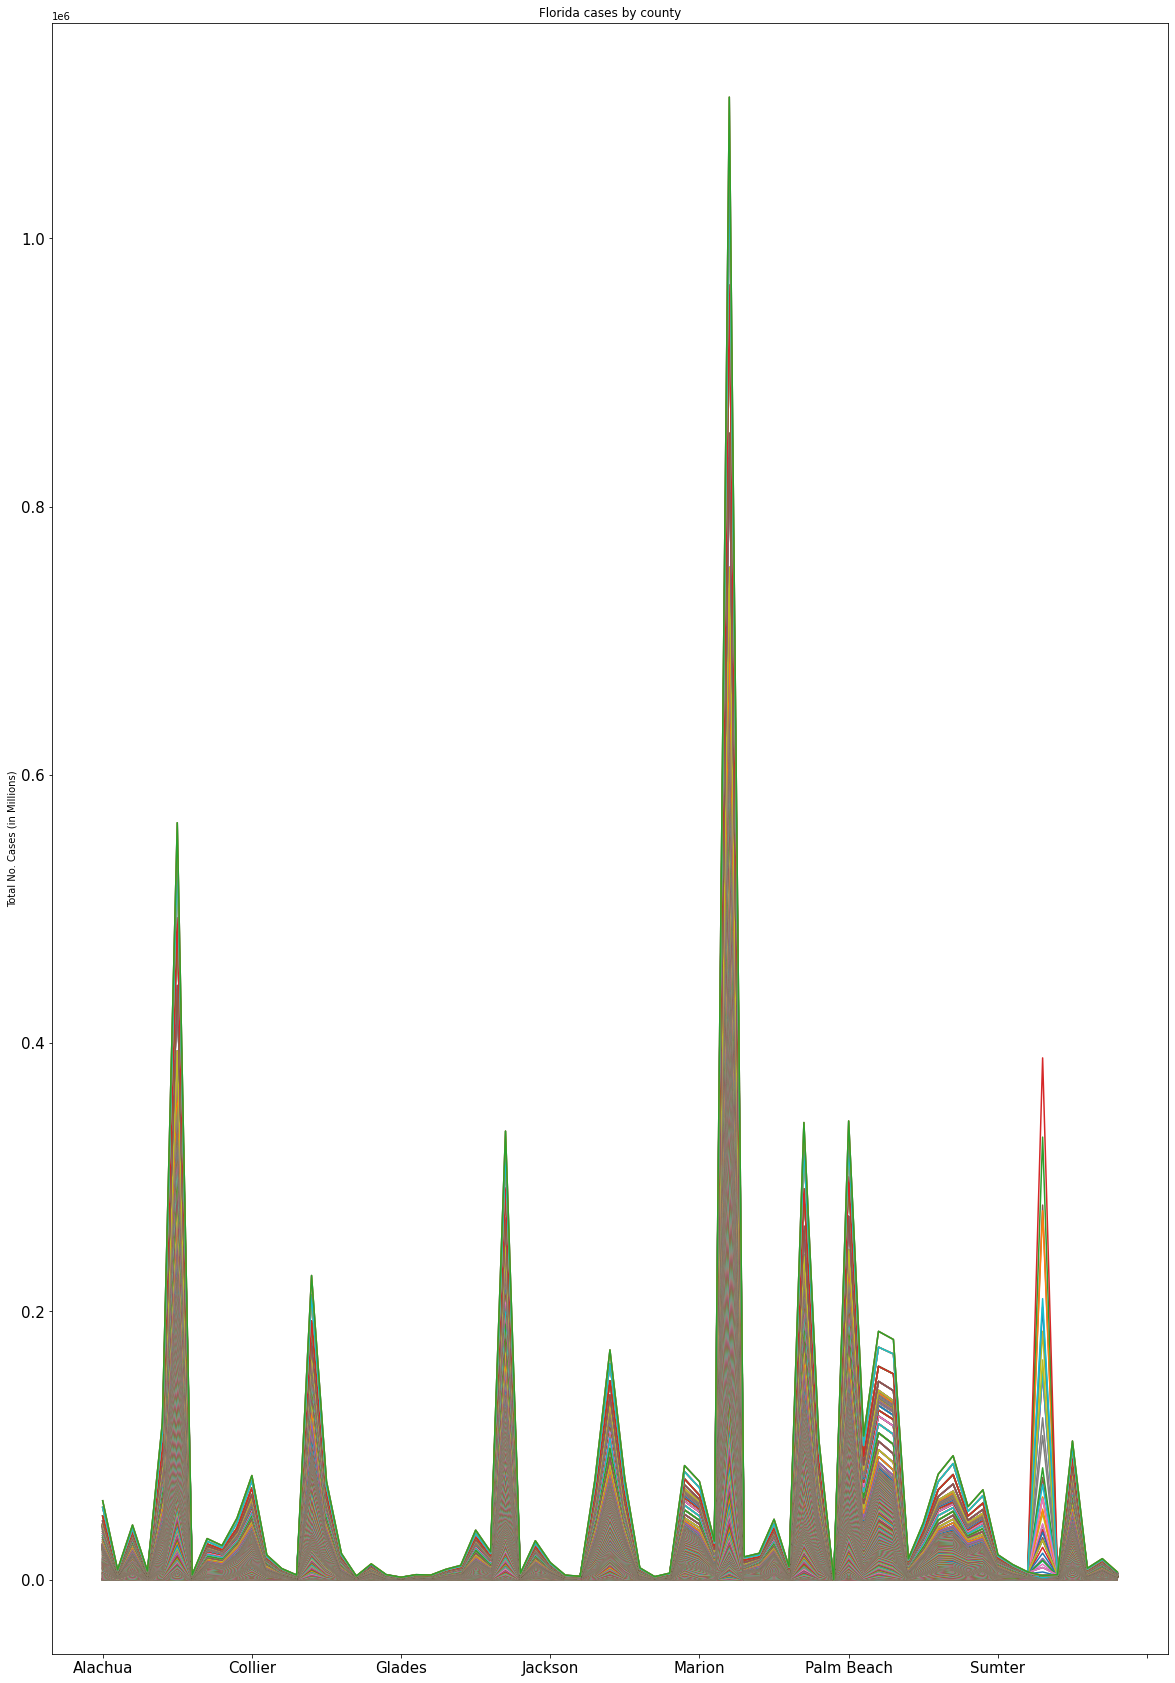

In [33]:
Flor.plot(title=('Florida cases by county'),figsize=(20,30),fontsize=15,legend=False)
plt.ylabel('Total No. Cases (in Millions)')

In [34]:
# Pivot the DF so it's by dae instead of by county
Florida_Counties=[]
for i in Flor.columns:
    Florida_Counties.append(Flor[i])
dframe_Flor=DataFrame(Florida_Counties)  

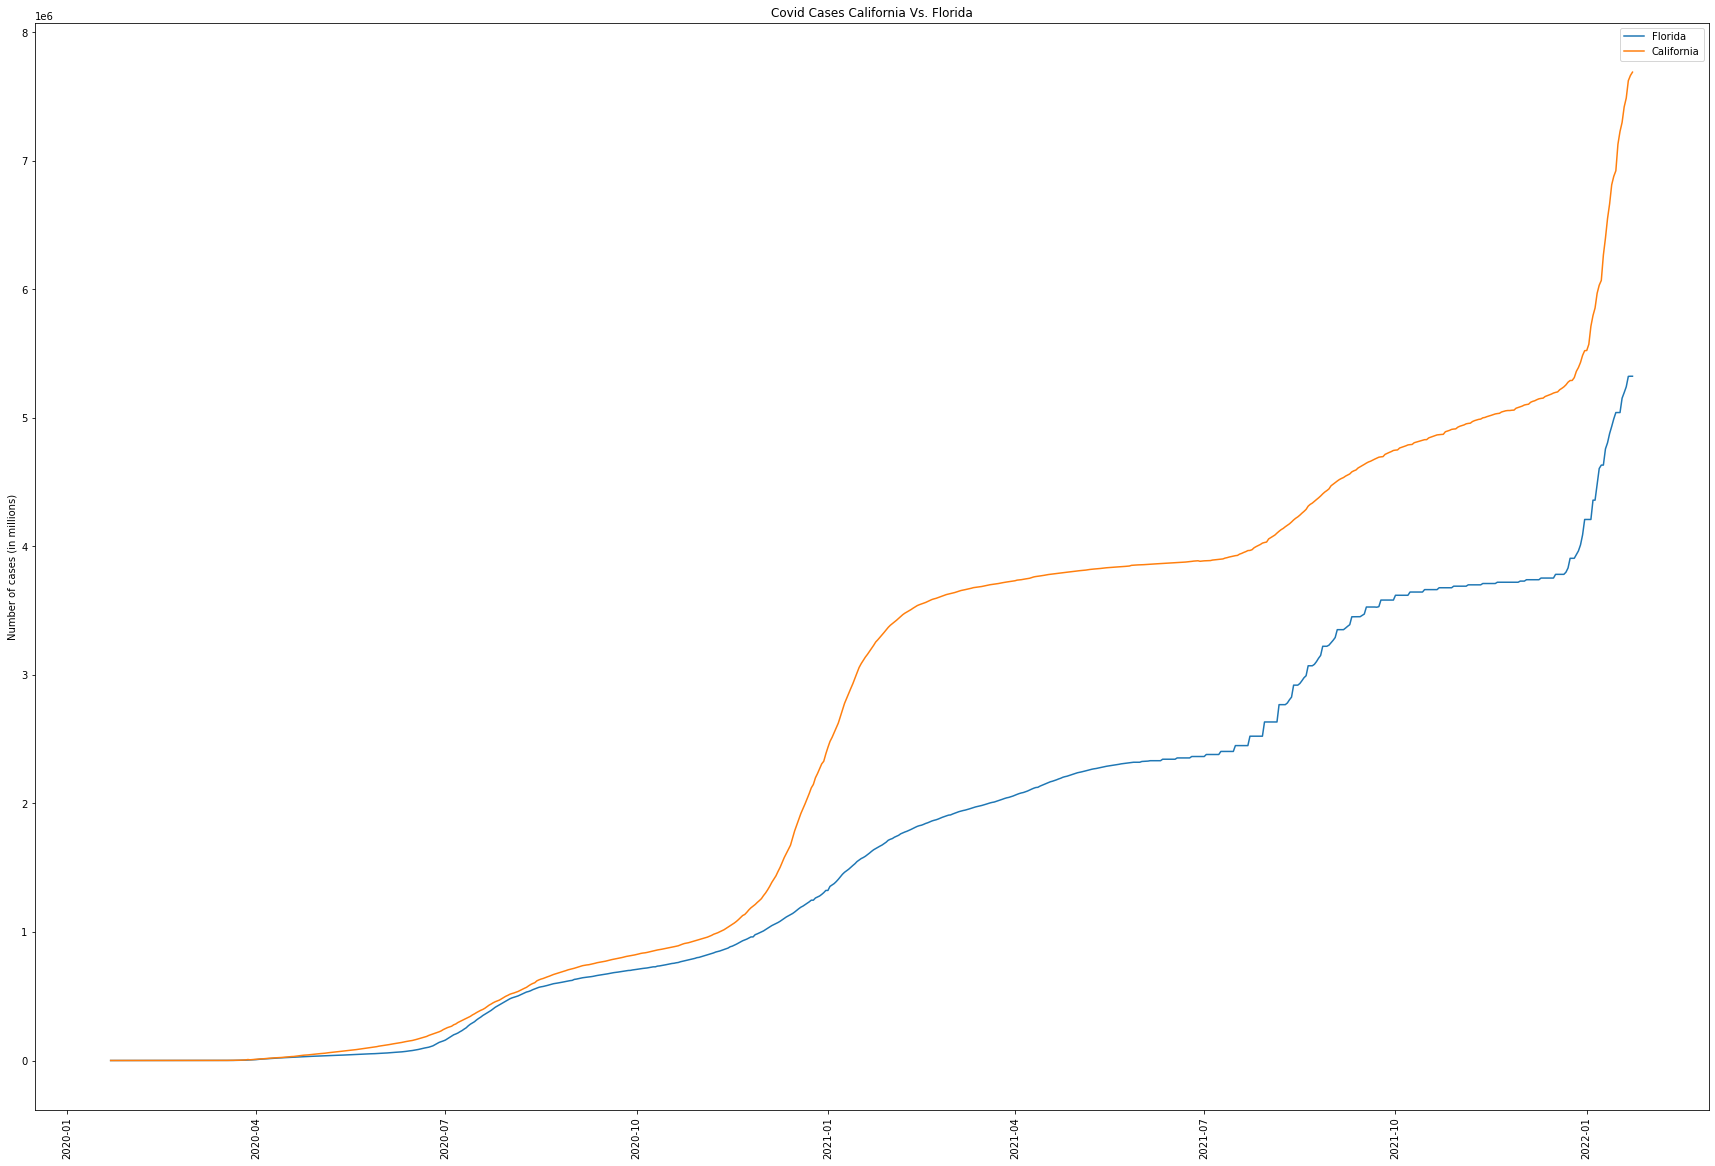

In [37]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases California Vs. Florida")
_= plt.plot(Flor.sum(), label='Florida')
_= plt.plot(Cal.sum(), label='California')
_= plt.ylabel('Number of cases (in millions)')
_= plt.xticks(rotation=90)
_= plt.legend()
plt.show()

In [112]:
_.figure.savefig('./figures/CA_v_Fl_cases.png')

In [35]:
# Populations per 1000 residents
Cal_pop=39538.223
Flor_pop=21538.187

In [36]:
# per capita calculations for covid cases per 1000 residents
Cal_sum=Cal.sum()
Flor_sum=Flor.sum()

Cal_per_Cap = Cal_sum.div(39538.223)
Flor_per_Cap = Flor_sum.div(21538.187)


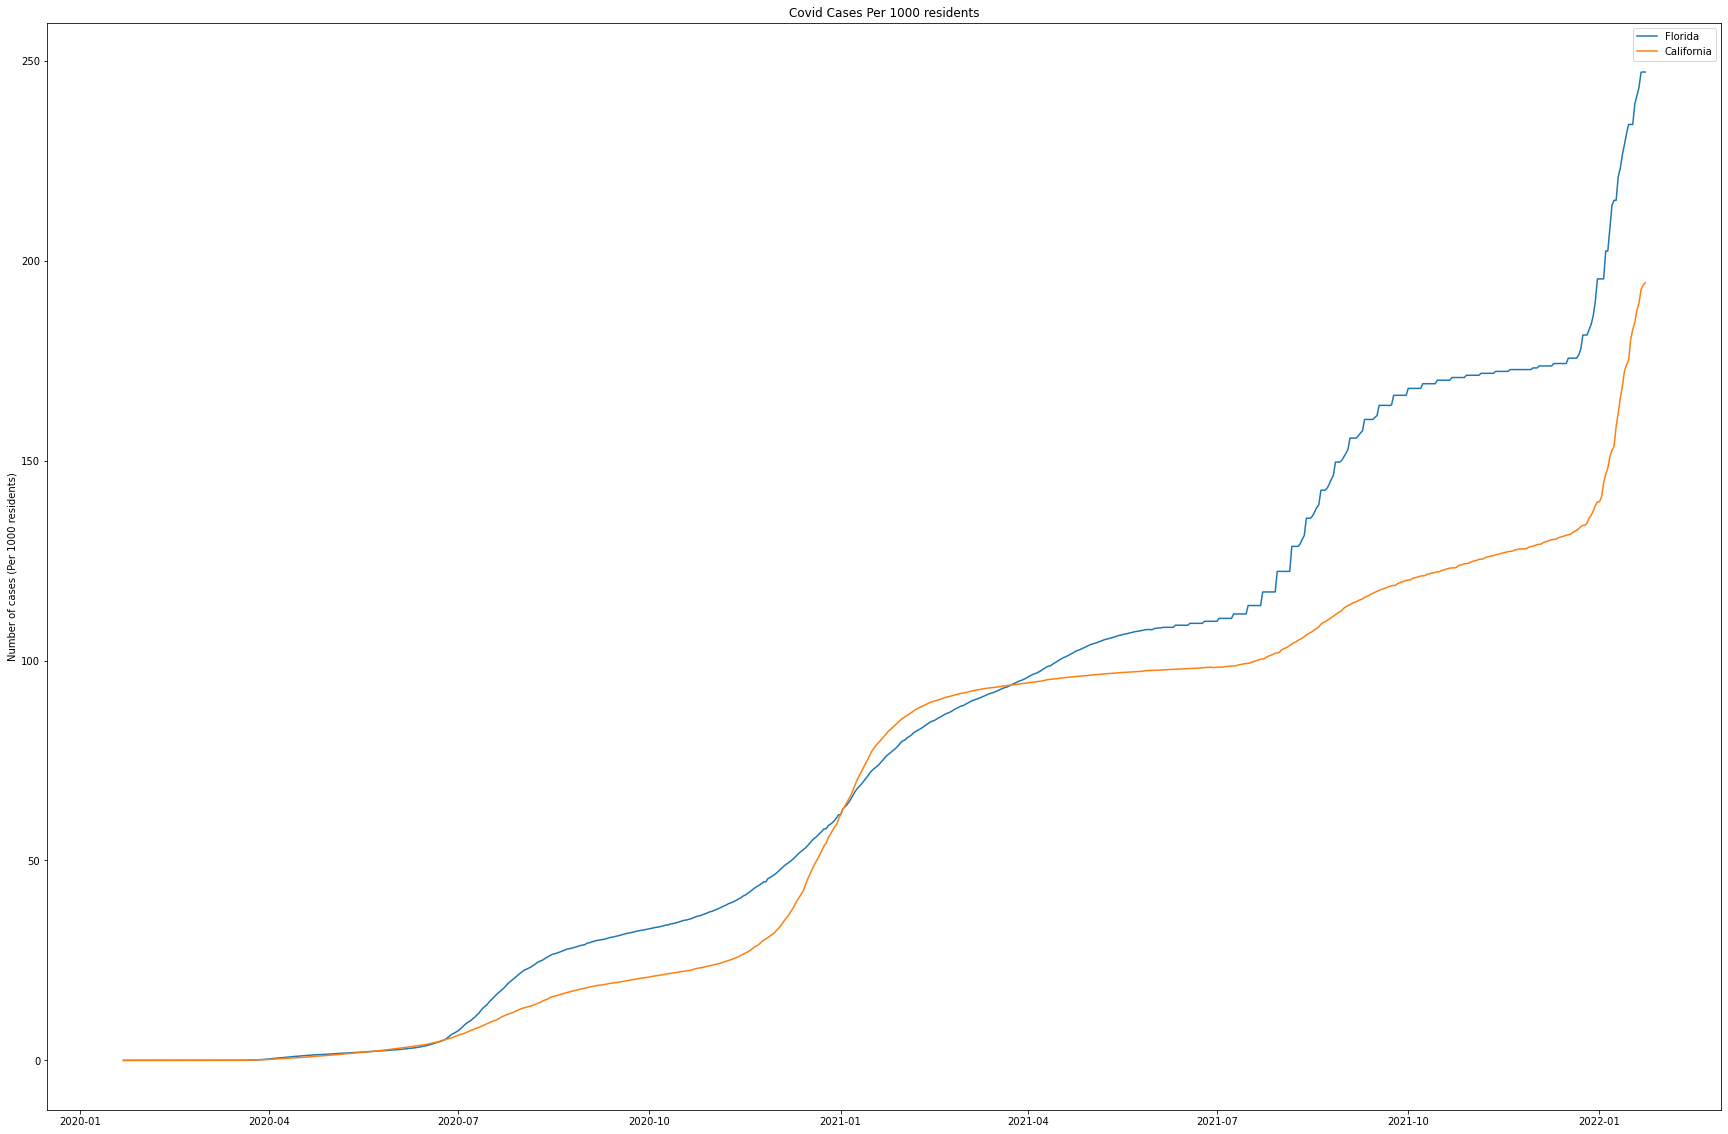

In [38]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents")
_= plt.plot(Flor_per_Cap, label='Florida')
_= plt.plot(Cal_per_Cap, label='California')
_= plt.ylabel('Number of cases (Per 1000 residents)')
#_= plt.xticks(rotation=90)
_= plt.legend()
plt.show()

**This is total number of cases in each state.  We should look at current case loads too**

In [124]:
_.figure.savefig('./figures/CA_v_Fl_cases_per1K.png')

In [39]:
# What about deaths?
us_deaths = dfs['us_deaths'].copy()
# Gets the data from California & Florida only
Cal_deaths=State_by_county(us_deaths,'California')
Flor_deaths=State_by_county(us_deaths,'Florida')

In [40]:
#Cal_County_Deaths=cities(dframe7)
#Flor_County_Deaths=cities(dframe8)
Cal_deaths_per_1k = Cal_deaths.div(39538.223)
Flor_deaths_per_1k = Flor_deaths.div(21538.187)

In [41]:
Cal_deaths.shape

(60, 733)

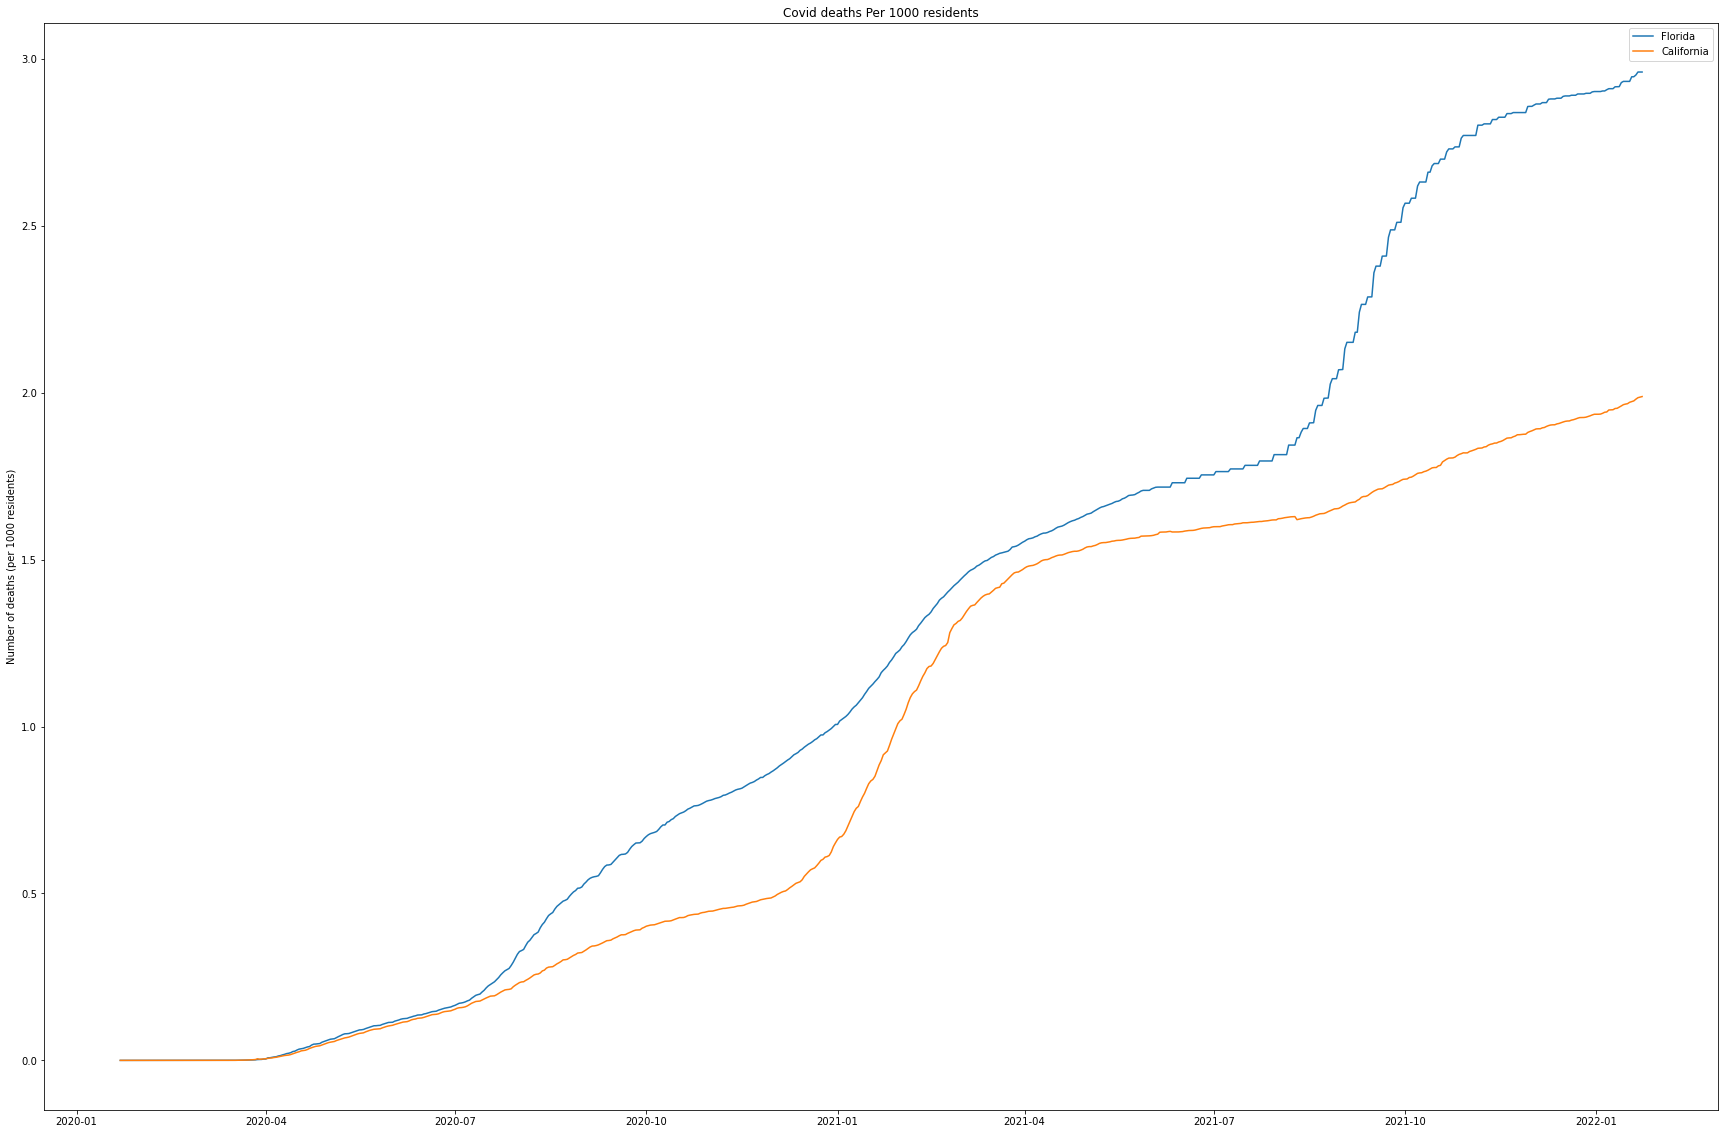

In [42]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents")
__= plt.plot(Flor_deaths_per_1k.sum(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum(), label='California')
__= plt.ylabel('Number of deaths (per 1000 residents)')
#__= plt.xticks(rotation=90)
__= plt.legend()
plt.show()

In [126]:
__.figure.savefig('./figures/CA_v_Fl_deaths_per1K.png')

In [43]:
# What about mortality rate?
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


### Mortality Calculations 

These calculation didn't seem to work because they have the flaw of not every state (or county) was up to date recording cases and deaths.  This leads to above 100% mortality rates at some dates which shouldn't be possible.  

In [50]:
def mortality (state):
    '''Takes a state from the simplified db of covid cases and adds a column for Mortality rate'''
    mask = simplified['Province/State']==state
    results=simplified.loc[mask,:]
    results['Mortality']=(results['Deaths']/results['Confirmed'])*100
    results.replace([np.inf, -np.inf], np.nan, inplace=True)
    results.dropna(inplace=True)
    return results

In [ ]:
Cal_deaths2=mortality('California')
Flor_deaths2=mortality('Florida')

In [51]:
Cal_deaths2.describe()

,Confirmed,Deaths,Mortality
count,3.961900e+04,39619.000000,39619.000000
mean,4.643215e+04,685.258689,1.391399
std,1.504318e+05,2557.388636,3.272900
min,1.000000e+00,0.000000,0.000000
25%,6.615000e+02,6.000000,0.688587
50%,5.935000e+03,66.000000,1.137412
75%,3.140300e+04,367.000000,1.498734
max,2.494097e+06,28480.000000,100.000000


In [52]:
Flor_deaths2.describe()

,Confirmed,Deaths,Mortality
count,4.584200e+04,45842.000000,45842.000000
mean,2.682041e+04,423.443283,3.898352
std,6.907227e+04,1382.816541,37.967290
min,1.000000e+00,0.000000,0.000000
25%,1.441000e+03,21.000000,1.070664
50%,5.179000e+03,87.000000,1.545232
75%,2.206700e+04,368.000000,2.226142
max,1.105391e+06,25840.000000,1566.666667


Maxamun of 100% mortality in California!  And 1566% in Florida?  This clearly shows that our collection of data is not catching all the individuals who have COVID in relation to those who die with it.  

This could be like concervatives have been saying and we are reporting more deaths associated with COVID than are people who have COVID,  OR we are under reporting those who have COVID thus the death numbers get too high.  

Either way it's not a useful metric.

In [53]:
# The first time I did this I didn't do my calculations correctly.  This groups by dat and gets the sum to compare.
Flor_deaths2.groupby('Date').fillna(0).sum()

Admin2            AlachuaAlachuaAlachuaAlachuaAlachuaAlachuaAlac...
Province/State    FloridaFloridaFloridaFloridaFloridaFloridaFlor...
Confirmed                                                1229501228
Deaths                                                     19411487
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                             178708.259876
dtype: object

In [54]:
print("Overall Florida Mortality: ", round((Flor_deaths2['Deaths'].fillna(0).sum()/Flor_deaths2['Confirmed'].fillna(0).sum())*100,2), '%')

Overall Florida Mortality:  1.58 %


In [55]:
Cal_deaths2.groupby('Date').fillna(0).sum()

Admin2            AlamedaAlamedaAlamedaAlamedaAlamedaAlamedaAlam...
Province/State    CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Confirmed                                                1839595402
Deaths                                                     27149264
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                              55125.831287
dtype: object

In [56]:
print("Overall California Mortality: ", round((Cal_deaths2['Deaths'].fillna(0).sum()/Cal_deaths2['Confirmed'].fillna(0).sum())*100,2), '%')

Overall California Mortality:  1.48 %


**not a very big difference. But things are looking better in California**

In [57]:
Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].describe()

count    68.000000
mean      1.859214
std       2.350779
min       0.594118
25%       1.271703
50%       1.511954
75%       1.858013
max      20.432286
Name: Mortality, dtype: float64

In [58]:
Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].describe()

count    59.000000
mean      0.893338
std       0.363525
min       0.000000
25%       0.689491
50%       0.854473
75%       1.104018
max       1.673750
Name: Mortality, dtype: float64

In [59]:
print ('Mortality Florida 2022-01-23','\nMean: ',Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].mean(), '\nMax: ',Flor_deaths2['Mortality'][Flor_deaths2["Date"]=='2022-01-23'].max())
print('')
print ('Mortality California 2022-01-23','\nMean: ',Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].mean(), '\nMax: ',Cal_deaths2['Mortality'][Cal_deaths2["Date"]=='2022-01-23'].max())

Mortality Florida 2022-01-23 
Mean:  1.8592135914565808 
Max:  20.432286389733196

Mortality California 2022-01-23 
Mean:  0.893338023441981 
Max:  1.6737495913697287


This tells a much different story.  Overall mortality rate seemed pretty close.  However when you look at the data factoring in individual county variability <font color='red'>California is less than 1/2 as likely to have a covid case result in death than Florida on average, During the worst of it was **12 times more likely** to die in Florida than California.</font> 

<font> Now the 1 million dollar question is what statistic is the more representative one?  One one hand the total population statistic doesn't take in to account the variabiliy per county.  It smooths it all out even though there were counties with a mortality rate above 20%.  However if that county only had 100 people in it and 20 died that wouldn't be very representative of the state in a whole and inflate the lethality of COVID.</font>

It's useful to look at it both ways, Perhapse if we could look at the data for the county we live in it would be more informative (hence selecting ones 'bubble' as this project was designed to do)

Either way lets look at some graphs where we can compare the two states side by side and see the confidence intervals.

In [60]:
import seaborn as sns

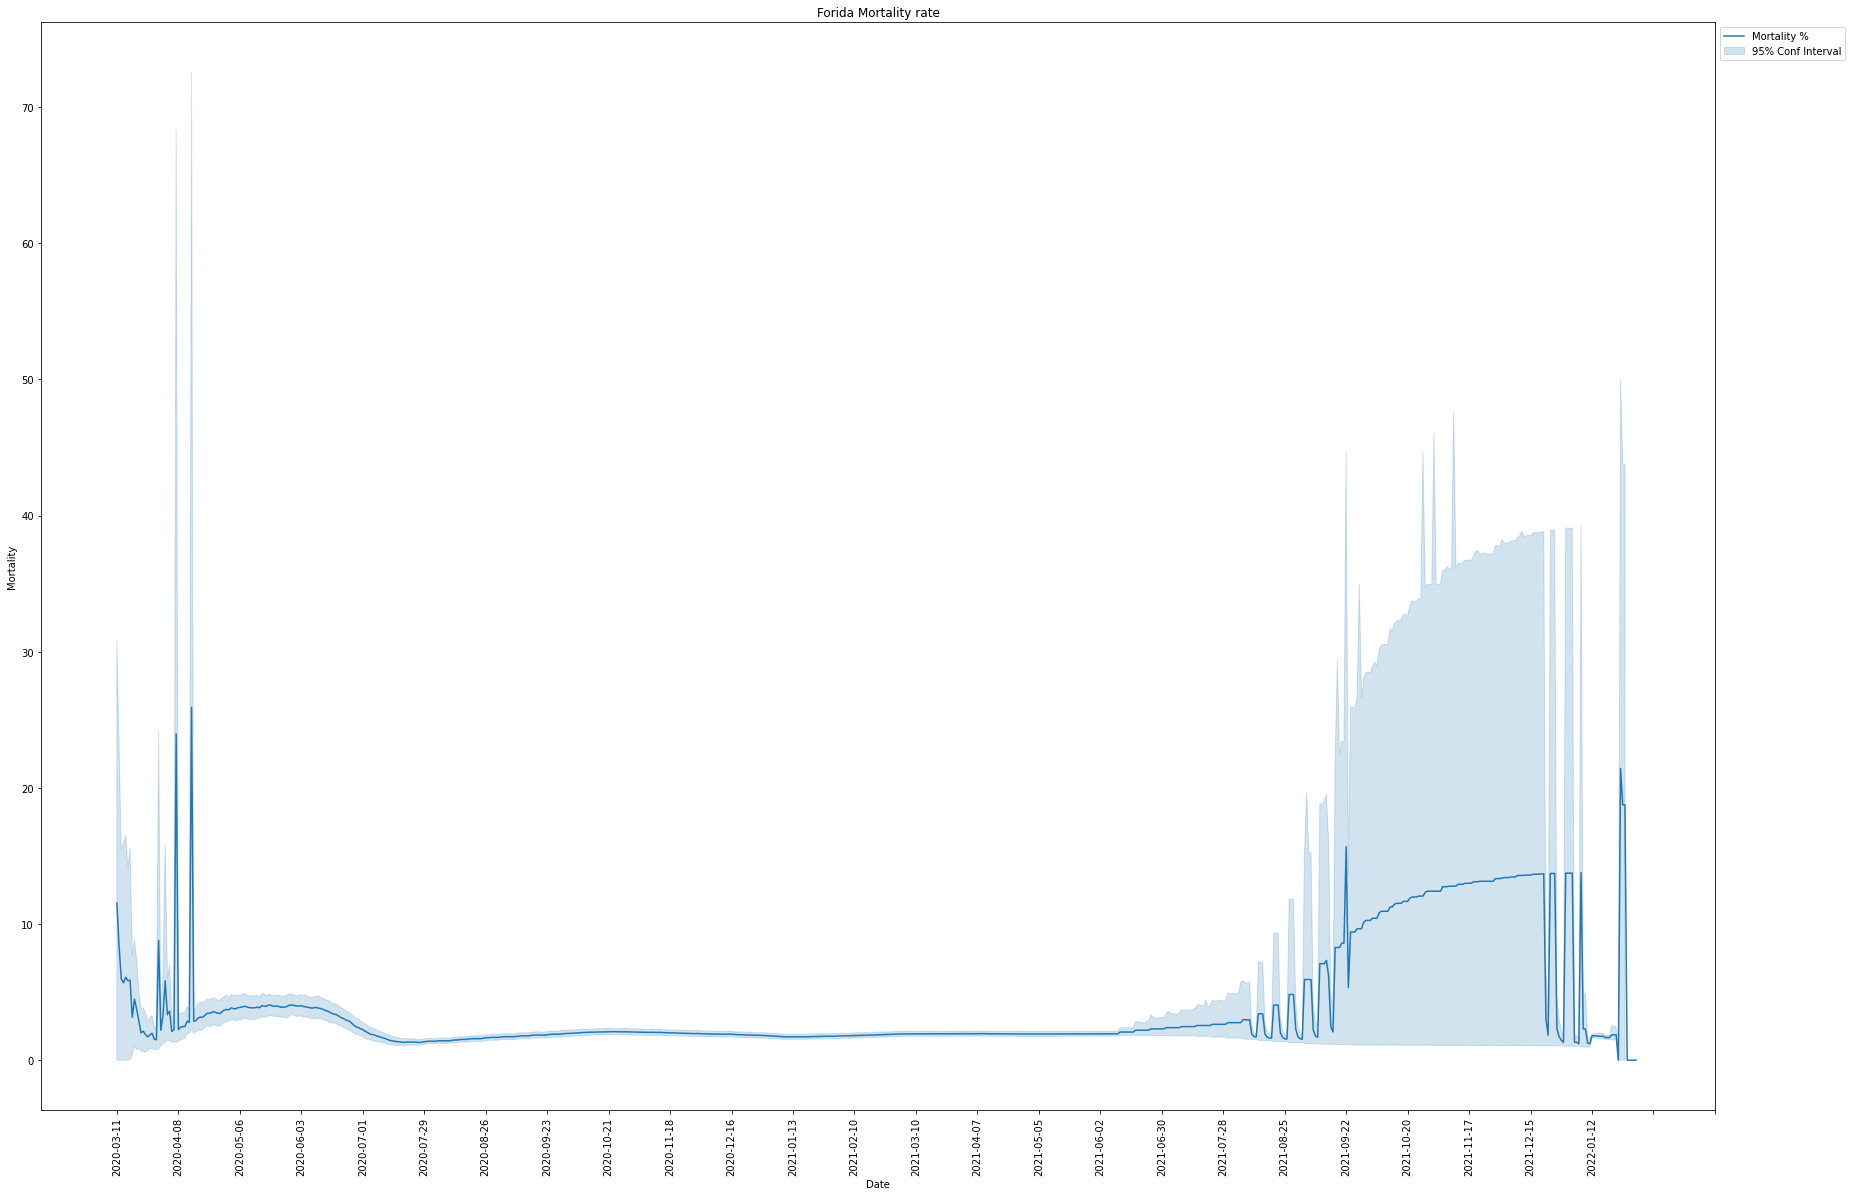

In [61]:
g= plt.figure(figsize=(30,20))
g= plt.title('Forida Mortality rate')
g= sns.lineplot(data=Flor_deaths2,x='Date',y='Mortality')
g.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(range(0,Flor_deaths.shape[1],28) ,rotation=90)
plt.show()

**Mortality rates in Florida have certainly gotten really high at times... 20%! at one point!**

And looking at max and mean above I now know why the 95% confidence interval is so high!  There is a lot of variability in Florida's Data.

In [62]:
g.figure.savefig('./figures/Florida_Mortality.png')

In [63]:
from datetime import datetime

In [64]:
Cal_deaths2['Date']=Cal_deaths2['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp/ipykernel_5140/695216615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_deaths2['Date']=Cal_deaths2['Date'].apply(lambda x:


In [65]:
Cal_deaths2['Date']

144440   2020-03-01
144441   2020-03-02
144442   2020-03-03
144443   2020-03-04
144444   2020-03-05
            ...    
188376   2022-01-19
188377   2022-01-20
188378   2022-01-21
188379   2022-01-22
188380   2022-01-23
Name: Date, Length: 39619, dtype: datetime64[ns]

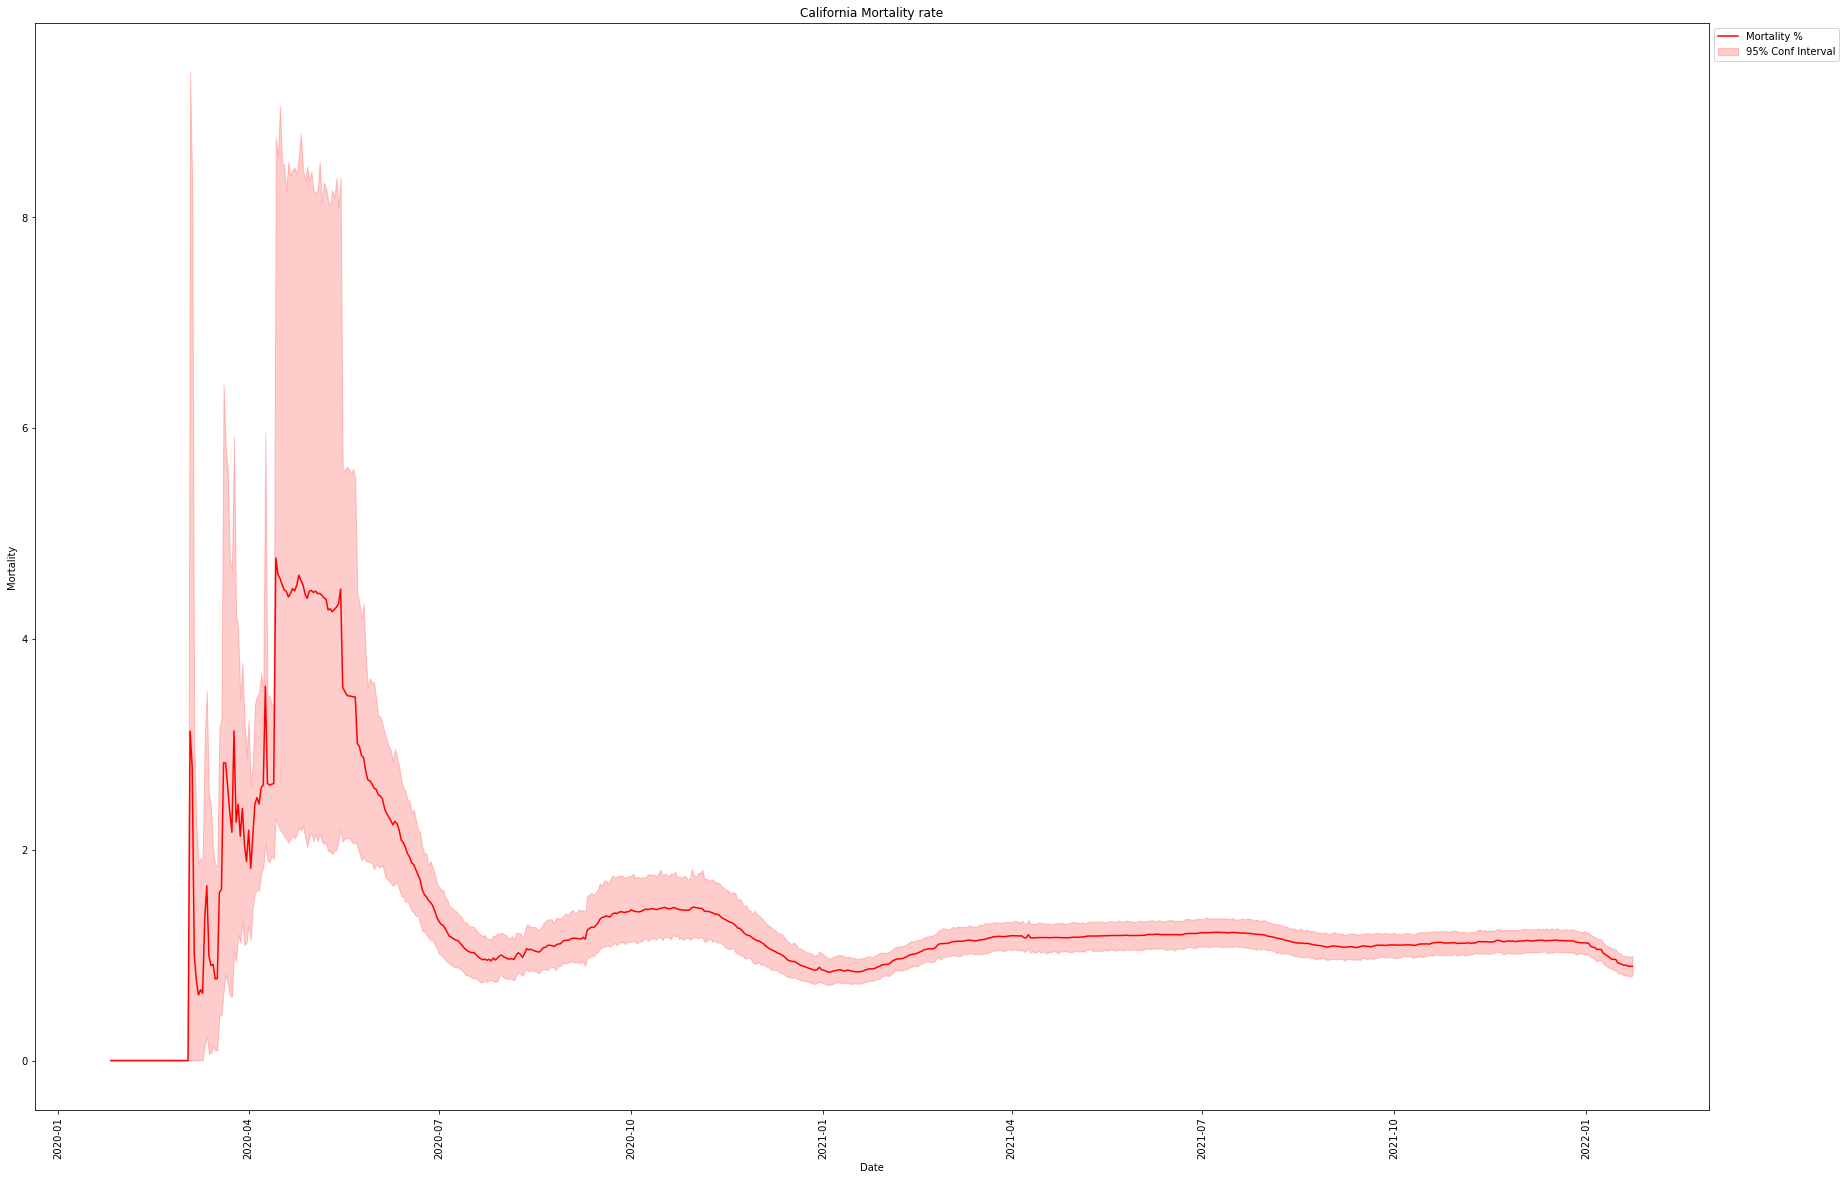

In [66]:
f= plt.figure(figsize=(30,20))
f=plt.title('California Mortality rate')
f=sns.lineplot(data=Cal_deaths2,x='Date',y='Mortality', color='red')
f.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

**California has had almost 9% mortality at times, but is below 2% for most of COVID**

The Omicron surge was really bad for Florida, but not as bad for California?  Maybe I should look at them together just to see if that is right since the scales are so different.

In [67]:
f.figure.savefig('./figures/California_Mortality.png')

In [68]:
# Lets convert the dates in Florida to a datetime object instead of a string
Flor_deaths2['Date']=Flor_deaths2['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp/ipykernel_5140/3460167453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flor_deaths2['Date']=Flor_deaths2['Date'].apply(lambda x:


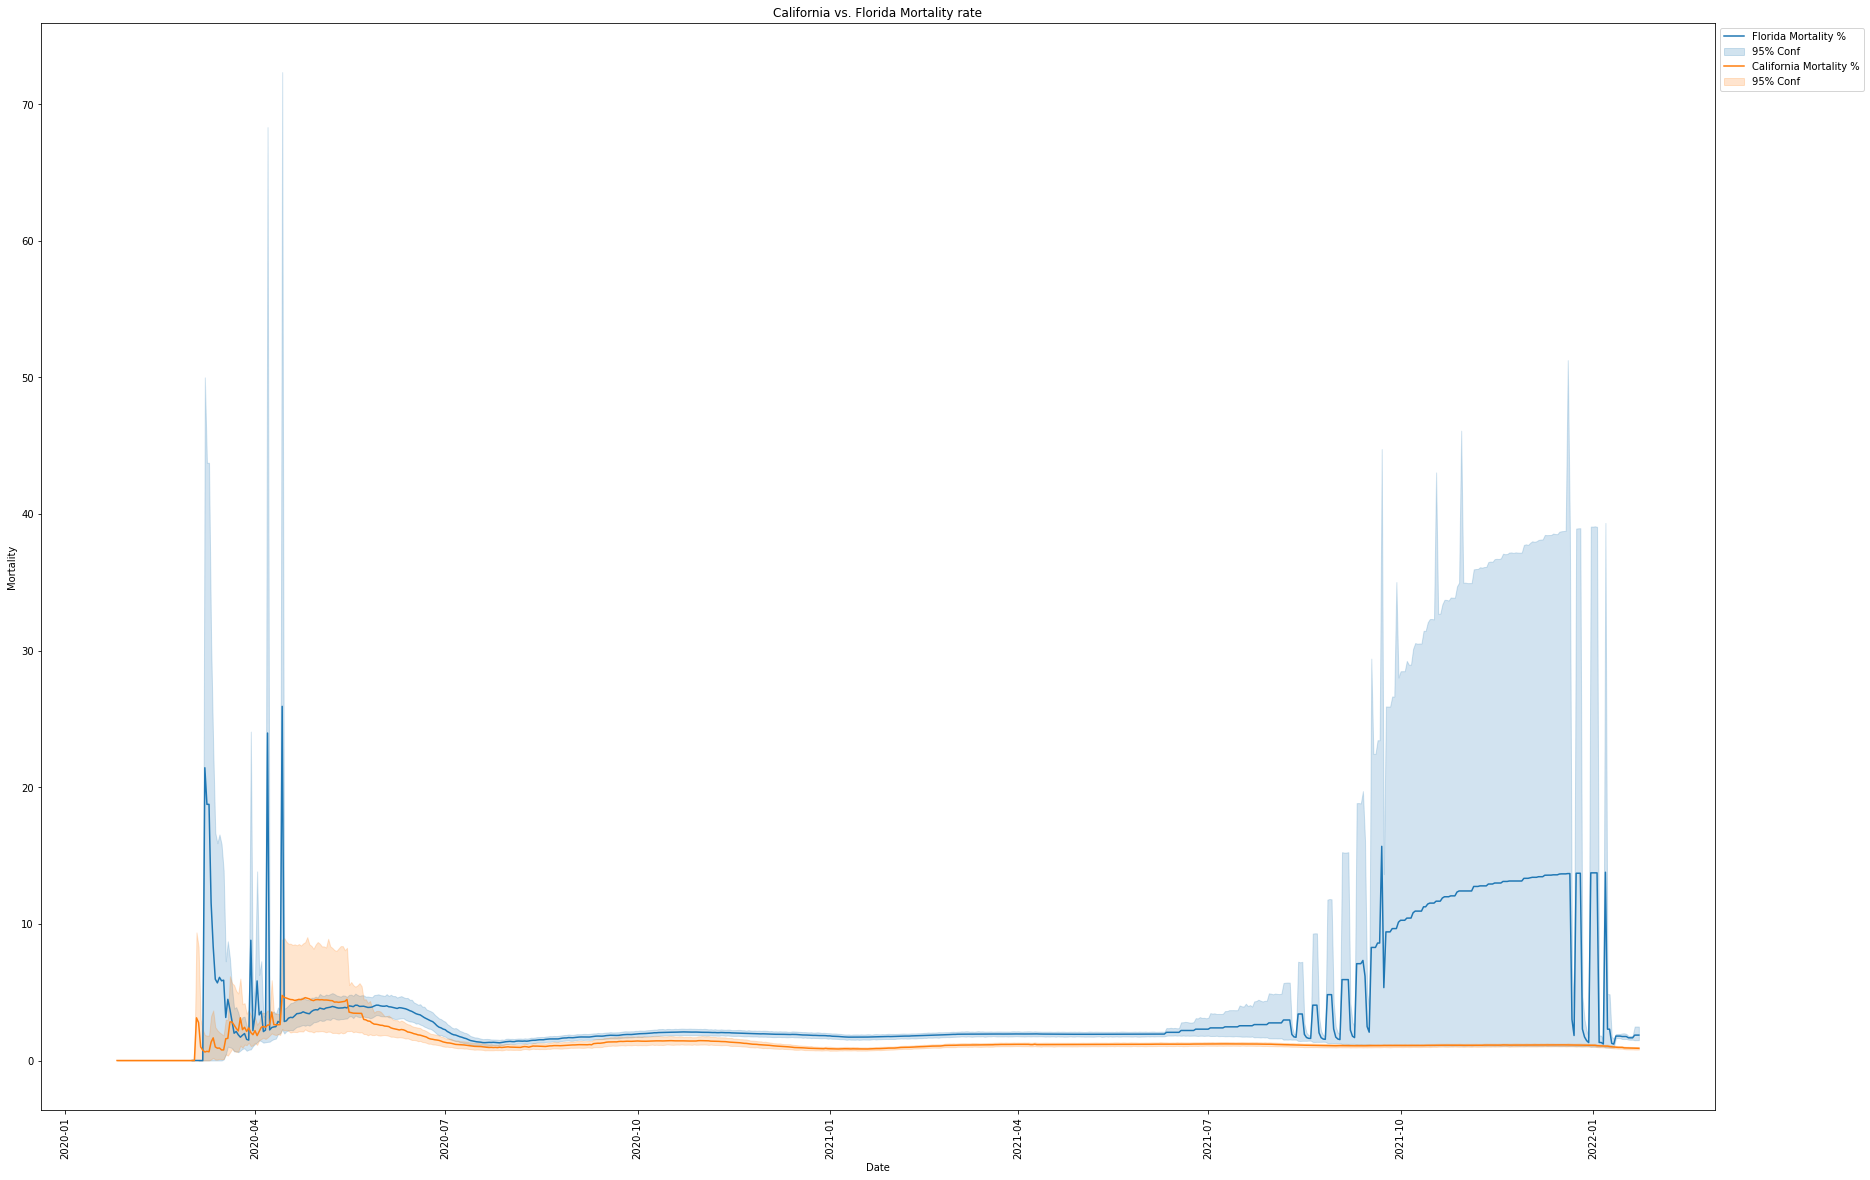

In [69]:
h= plt.figure(figsize=(30,20))
h= plt.title('California vs. Florida Mortality rate')
h= sns.lineplot(data=Flor_deaths2,x='Date',y='Mortality')
h= sns.lineplot(data=Cal_deaths2,x='Date',y='Mortality')
h.legend(labels=["Florida Mortality %","95% Conf", "California Mortality %", "95% Conf"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

In [70]:
h.figure.savefig('./figures/Cal_vs_Florida_deaths.png')

Well it looked like mortality in both states had finally leveled out, but in reality Florida is still a much more lethal state to live in.  Almost double the mortality rate currently.  The one clear thing I can see from this data is that California has better control thus less variability in the mortality rate than does Florida.

In [71]:
Cal=mortality('California')

C:\Users\User\AppData\Local\Temp/ipykernel_5140/2078410758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Mortality']=(results['Deaths']/results['Confirmed'])*100
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [72]:
simplified.apply(lambda x: x['Mortality']=(0 if (x['Confirmed']==0 or x['Deaths']/x['Confirmed']==0),0 else x['Deaths']/x['Confirmed'])*100 )

SyntaxError: invalid syntax (Temp/ipykernel_5140/4246286982.py, line 1)

In [73]:
# Next order of business is to do this for every state in the US
# Lets start by conveting the date to a datetime object
simplified['Date']=simplified['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

In [74]:
# Next we will create the Mortality column
simplified['Mortality']=(simplified['Deaths']/simplified['Confirmed'])*100
simplified.dropna(inplace=True)
simplified.replace([np.inf, -np.inf], np.nan, inplace=True)
simplified.fillna(0,inplace=True)

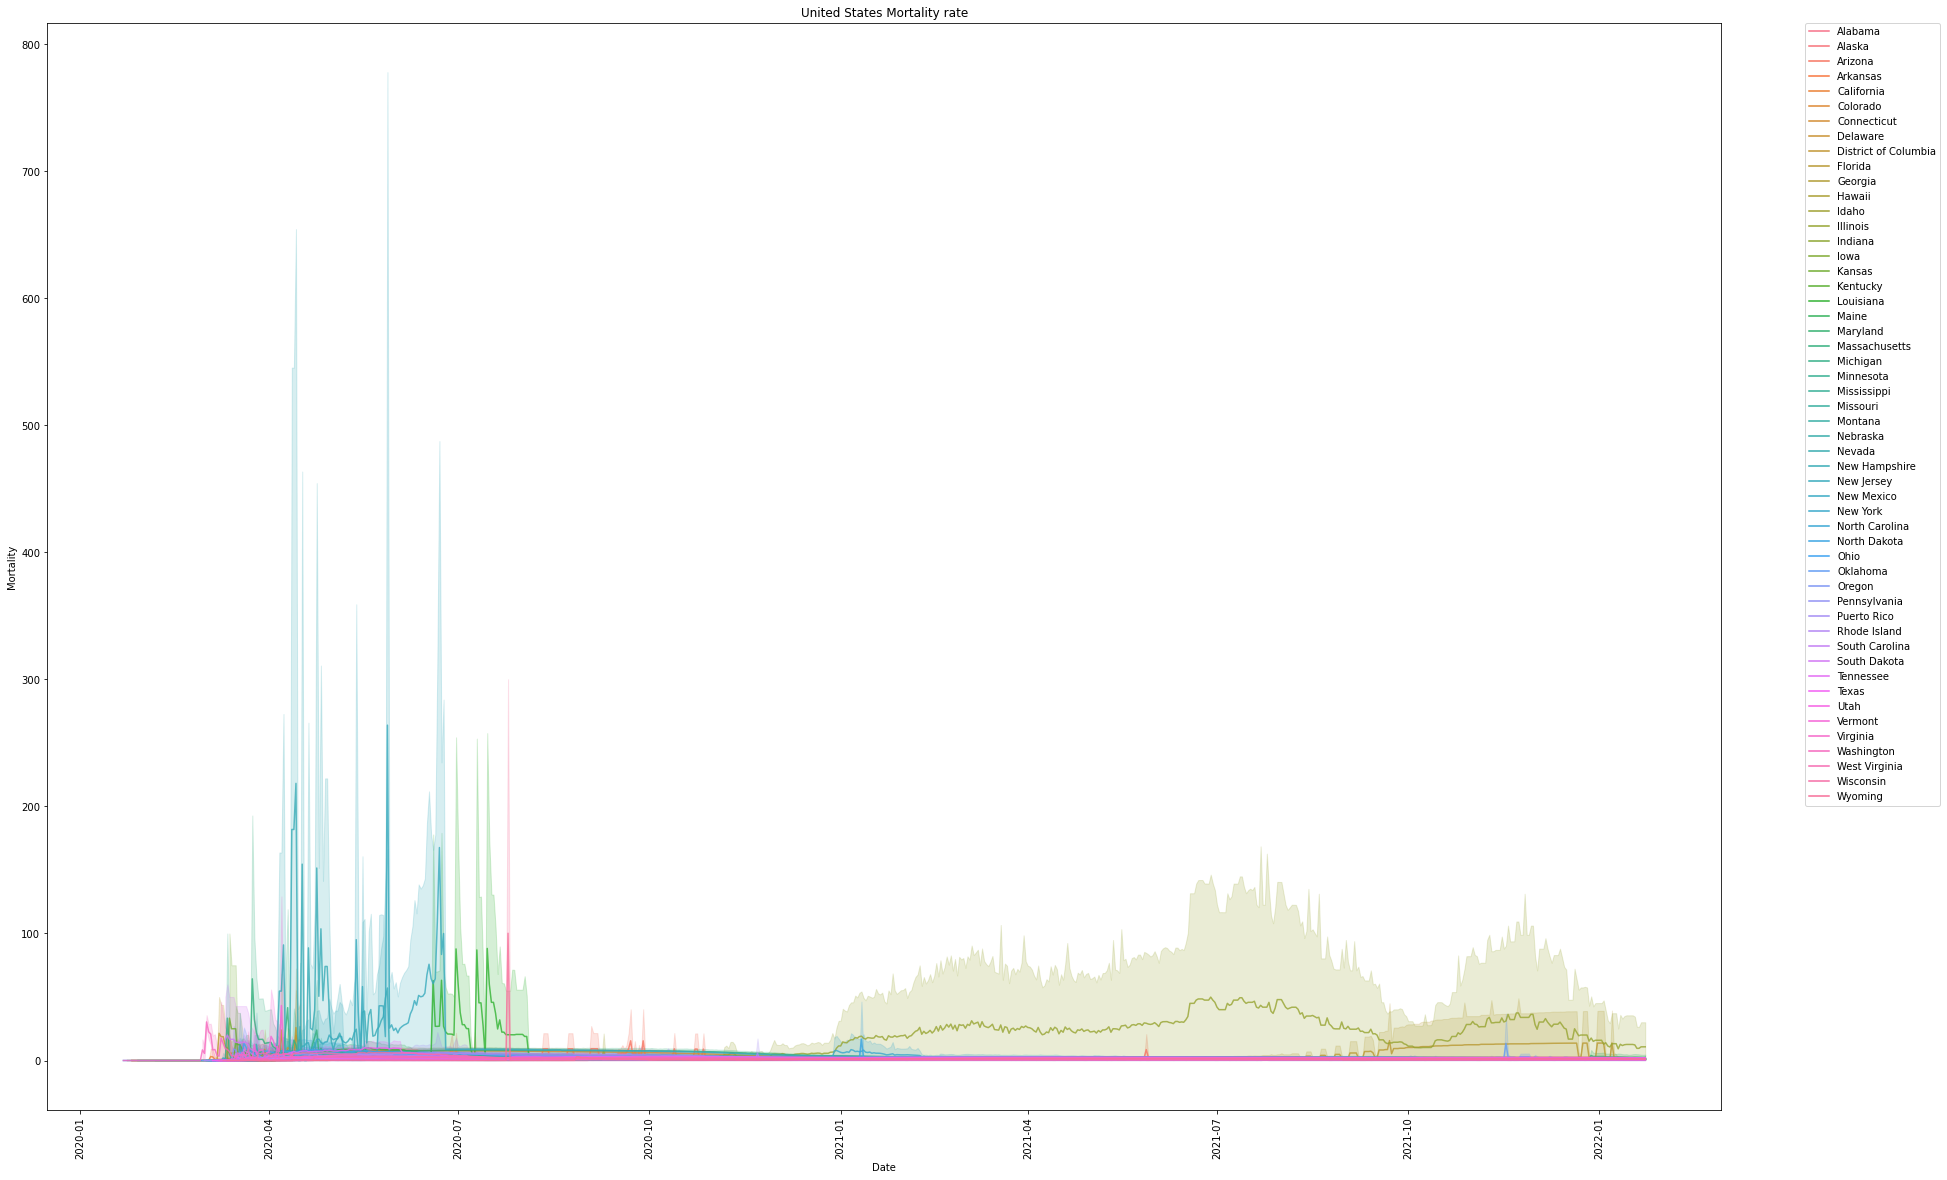

In [84]:
I= plt.figure(figsize=(30,20))
I= plt.title('United States Mortality rate')
I=sns.lineplot(data=simplified, x='Date',y='Mortality', hue='Province/State', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

In [ ]:
I.figure.savefig('./figures/United_States_Mortality_COVID.png')

In [75]:
pd.set_option('display.max_rows', None)
simplified.groupby(by='Province/State').describe()


Confirmed                                               \
                         count          mean            std   min       25%   
Province/State                                                                
Alabama                45074.0   6284.840063   12238.663041   0.0    772.00   
Alaska                 18160.0   2150.914262    6788.245268   0.0     55.00   
Arizona                10464.0  41364.575975  122657.303449   0.0   1454.75   
Arkansas               50551.0   3522.351131    6922.944603   1.0    388.00   
California             39641.0  46406.382331  150394.045622   0.0    656.00   
Colorado               43126.0   6028.113690   16272.347561   0.0     93.00   
Connecticut             6100.0  25916.156230   36319.218366   1.0   1467.00   
Delaware                2704.0  19080.407914   24579.273136   0.0    460.75   
District of Columbia     679.0  37213.743741   26162.320302  22.0  14063.00   
Florida                45848.0  26816.899930   69068.431309   0.0   1439.75   
Georgia               107898.0   5276.264305   13399.708712   1.0    424.00   
Hawaii                  3455.0   7068.394211   15002.477647   1.0    135.00   
Idaho                  28641.0   3404.346077    8934.827130   1.0    176.00   
Illinois               68843.0   9670.506268   47701.972935   0.0    317.00   
Indiana                62437.0   5863.954867   12816.795586   0.0    432.00   
Iowa                   66090.0   2780.865033    6322.988202   0.0    337.00   
Kansas                 67751.0   2334.335537    7939.277150   0.0    125.00   
Kentucky               79684.0   2960.574708    8183.075562   0.0    202.00   
Louisiana              43735.0   6009.947616   10330.540390   0.0    815.50   
Maine                  11348.0   2820.550758    4827.785575   1.0     60.00   
Maryland               16889.0  13044.329860   22015.968375   0.0   1047.00   
Massachusetts           9646.0  34430.071429   41730.056181   0.0   2935.50   
Michigan               57958.0   7832.068739   22156.228618   0.0    273.00   
Minnesota              58189.0   4960.490780   14287.887261   0.0    270.00   
Mississippi            55050.0   3115.938020    4729.700842   1.0    572.25   
Missouri               76355.0   4070.452623   11286.873425   0.0    250.00   
Montana                34486.0   1641.022328    3819.462336   0.0     80.00   
Nebraska               59151.0   1838.657909    7430.435557   0.0     54.00   
Nevada                 10947.0  14698.187266   54429.155455   0.0     71.00   
New Hampshire           7411.0   6290.381325   10896.775315   0.0    272.00   
New Jersey             14989.0  31603.300687   34596.689767   0.0   5603.00   
New Mexico             22270.0   4518.955680   10268.733752   0.0    143.00   
New York               43206.0  23141.256238   56262.671302   0.0    443.00   
North Carolina         67253.0   7383.667465   15345.209242   0.0    657.00   
North Dakota           34399.0   1590.956946    4072.495863   0.0     75.00   
Ohio                   59408.0   9082.527421   20067.551181   0.0    557.00   
Oklahoma               51389.0   4355.284750   12275.953463   0.0    288.00   
Oregon                 23820.0   4552.508690    9151.069021   0.0    138.75   
Pennsylvania           45069.0  12444.150791   23751.290501   1.0    583.00   
Puerto Rico            50846.0   1313.623904    2646.604625   1.0    120.00   
Rhode Island            4067.0  17283.325055   29847.841667   0.0   1534.00   
South Carolina         31023.0   9582.117816   15951.759713   0.0    950.00   
South Dakota           42315.0   1409.697460    3875.589474   0.0    113.00   
Tennessee              64893.0   6706.271570   14829.821621   0.0    684.00   
Texas                 165638.0   8981.490256   39400.563970   0.0    195.00   
Utah                    9265.0  21515.893794   40382.890068   0.0   1014.00   
Vermont                10112.0   1241.555281    2156.592035   0.0     59.00   
Virginia               88521.0   3689.194282    8493.708187   0.0    29

This data looks like it needed to be cleaned first.  I don't think that we should ever have a Mortality above 100, b/c that would be 100%  So this means that reported deaths are above total reported cases.

Also note that my N is now not the same for all states

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
simplified[['Province/State','Confirmed','Deaths','Mortality']].groupby(by='Province/State').fillna(0).sum()

In [ ]:
(290709033/16433441282)*100

In [ ]:
simplified.groupby(by='Province/State').mean()

### Comparison by state

In [44]:
import seaborn as sns
from datetime import datetime

In [128]:
# Next order of business is to do this for every state in the US
# Lets start by conveting the date to a datetime object
#simplified['Date']=simplified['Date'].apply(lambda x: 
#                                    datetime.strptime(x,'%Y-%m-%d'))

# This step has been made obsolete now that I import the data as a datetime object

In [45]:
simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).sum()

Confirmed    16441171239
Deaths         290812747
dtype: int64

In [46]:
(290812747/16441171239)*100

1.7688079685598366

Looks like the mortality rate for the entire US is about 1.77%  That's higher than the calculated mortality of both Florida and California.  I'm guessing some other states have a higher rate.

In [48]:
simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State').fillna(0).std()

Confirmed    30954.836773
Deaths         573.132128
dtype: float64

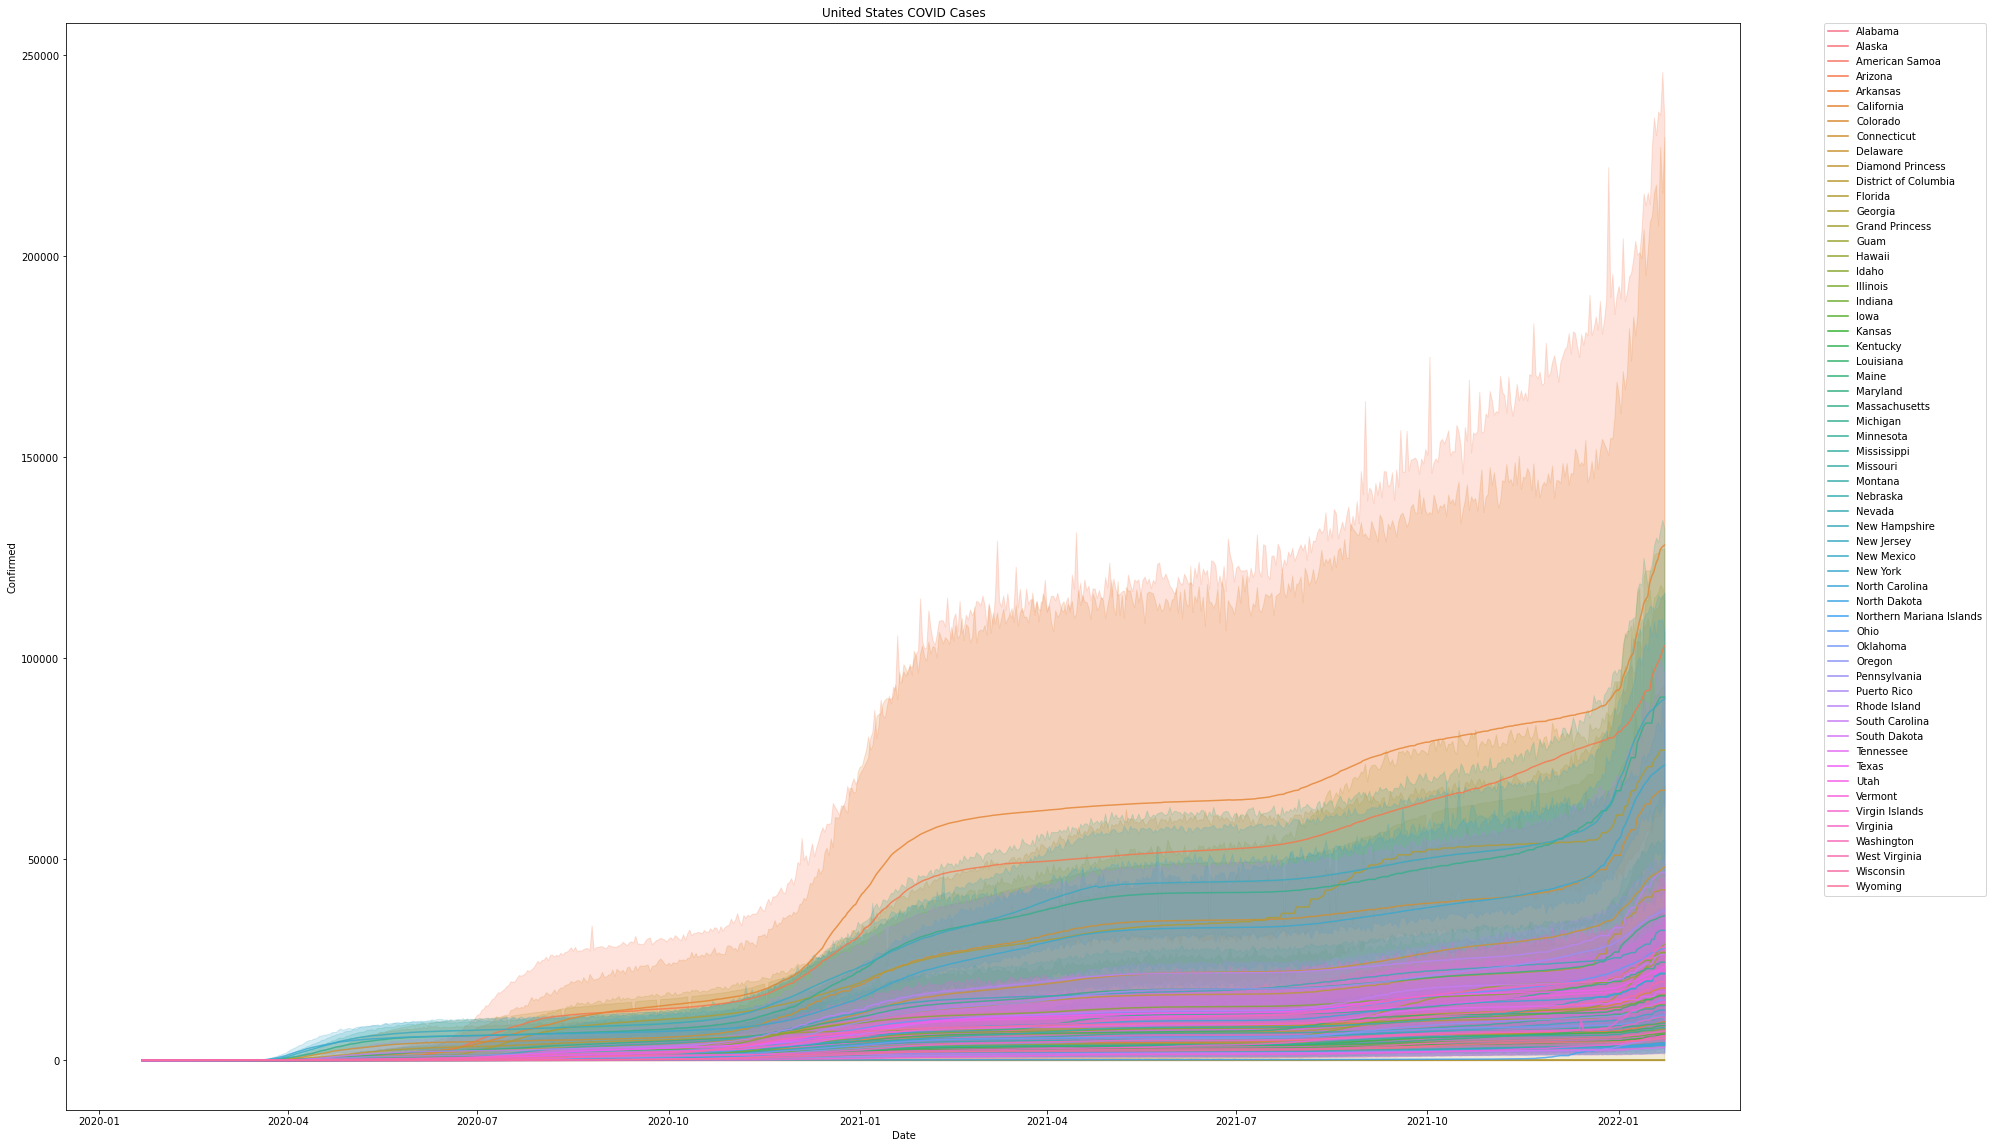

In [131]:
C= plt.figure(figsize=(30,20))
C= plt.title('United States COVID Cases')
C= sns.lineplot(data=simplified, x='Date',y='Confirmed', hue='Province/State', alpha=0.8)
C= plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [133]:
C.figure.savefig('./figures/Cases_per_State.png')

In [49]:
# Lets look at the the differences between states
States=simplified[['Province/State','Confirmed','Deaths']].groupby(by='Province/State')
States.describe()

Confirmed                                            \
                             count          mean            std  min     25%   
Province/State                                                                 
Alabama                    50577.0   5601.021828   11718.253051  0.0   354.0   
Alaska                     24189.0   1614.808508    5954.850198  0.0     0.0   
American Samoa               733.0      1.076398       2.951734  0.0     0.0   
Arizona                    12461.0  34735.488564  113418.788473  0.0    74.0   
Arkansas                   56441.0   3154.769972    6639.669003  0.0   116.0   
California                 43980.0  41827.999136  143451.501401  0.0   201.0   
Colorado                   48378.0   5373.691161   15477.708189  0.0    36.0   
Connecticut                 7330.0  21567.333288   34518.306535  0.0   633.0   
Delaware                    3665.0  14077.332333   22718.600987  0.0     0.0   
Diamond Princess             733.0     45.315143      12.915985  0.0    49.0   
District of Columbia        2199.0  11490.737608   22513.174212  0.0     0.0   
Florida                    50577.0  24309.493011   66221.995667  0.0   768.0   
Georgia                   118013.0   4824.030963   12897.445091  0.0   238.0   
Grand Princess               733.0     94.135061      28.352620  0.0   103.0   
Guam                         733.0   7065.613915    6465.802999  0.0   332.0   
Hawaii                      5131.0   4759.559930   12748.821711  0.0     0.0   
Idaho                      33718.0   2891.745537    8324.227793  0.0    27.0   
Illinois                   76232.0   8733.165377   45421.407866  0.0    98.0   
Indiana                    68902.0   5313.746335   12319.920330  0.0   178.0   
Iowa                       74033.0   2482.506045    6035.837694  0.0   100.0   
Kansas                     78431.0   2016.467557    7422.254785  0.0    20.0   
Kentucky                   89426.0   2638.051965    7779.371264  0.0    58.0   
Louisiana                  48378.0   5433.152652    9980.553490  0.0   433.0   
Maine                      13194.0   2425.921631    4582.976713  0.0    16.0   
Maryland                   19058.0  11559.748505   21135.231111  0.0   341.0   
Massachusetts              12461.0  26652.152235   39437.175685  0.0    59.0   
Michigan                   63771.0   7118.142102   21242.226257  0.0   111.0   
Minnesota                  65237.0   4424.574980   13581.589580  0.0    80.0   
Mississippi                61572.0   2785.882999    4573.838282  0.0   249.0   
Missouri                   86494.0   3593.306010   10685.250112  0.0    54.0   
Montana                    42514.0   1331.144940    3499.427661  0.0     5.0   
Nebraska                   69635.0   1561.836059    6879.766001  0.0    14.0   
Nevada                     13927.0  11553.174122   48630.476981  0.0     4.0   
New Hampshire               8796.0   5299.910869   10261.144113  0.0    43.0   
New Jersey                 16859.0  28097.863100   34097.810123  0.0  1806.5   
New Mexico                 25655.0   3922.710700    9688.774396  0.0    32.0   
New York                   46912.0  21313.120673   54354.177652  0.0   239.0   
North Carolina             74766.0   6641.705963   14722.122802  0.0   263.0   
North Dakota               40315.0   1357.492943    3803.722841  0.0     9.0   
Northern Mariana Islands     733.0    324.788540     758.328432  0.0    38.0   
Ohio                       65970.0   8179.093361   19236.381659  0.0   187.0   
Oklahoma                   57907.0   3865.054795   11646.067434  0.0    66.0   
Oregon                     27854.0   3893.184354    8612.811042  0.0    28.0   
Pennsylvania               50577.0  11088.942246   22753.368834  0.0   167.0   
Puerto Rico                58640.0   1139.026620    2504.473089  0.0    29.0   
Rhode Island                5131.0  13699.334048   27481.331306  0.0   197.0   
South Carolina             35184.0   8448.898391   15295.071701  0.0   351.0   
South Dakota             

In [50]:
States.sum()

,Confirmed,Deaths
Province/State,,
Alabama,283282881,5239645
Alaska,39060603,206366
American Samoa,789,0
Arizona,432838923,8211786
Arkansas,178058372,2868740
California,1839595402,27149306
Colorado,259968431,3343591
Connecticut,158088553,4314072
Delaware,51593423,849197


In [51]:
confirmed_max = States[['Province/State','Confirmed']].max()
deaths_max = States[['Province/State','Deaths']].max()
print('The state with the most cases is \n',confirmed_max.max())
print('The state with the most deaths is \n',deaths_max.max())

The state with the most cases is 
 Province/State    Wyoming
Confirmed         2494097
dtype: object
The state with the most deaths is 
 Province/State    Wyoming
Deaths              28480
dtype: object


Not so great for Wyoming!

In [52]:
County=simplified[['Province/State', 'Admin2','Confirmed','Deaths']].groupby(by=['Province/State','Admin2'])
County.describe()

Confirmed                                           \
                              count          mean           std  min     25%   
Province/State Admin2                                                          
Alabama        Autauga        733.0   4806.735334   3885.625855  0.0   918.0   
               Baldwin        733.0  16241.877217  14071.080641  0.0  2482.0   
               Barbour        733.0   1720.444748   1313.264802  0.0   540.0   
               Bibb           733.0   1923.607094   1590.357205  0.0   304.0   
               Blount         733.0   4753.418827   3925.230856  0.0   616.0   
...                             ...           ...           ...  ...     ...   
Wyoming        Teton          733.0   2496.713506   2144.480529  0.0   254.0   
               Uinta          733.0   1639.858117   1436.562198  0.0   227.0   
               Unassigned     733.0      0.572988      6.052293  0.0     0.0   
               Washakie       733.0    685.709413    623.705857  0.0    45.0   
               Weston         733.0    467.582538    420.115435  0.0     4.0   

                                                     Deaths              \
                               50%      75%      max  count        mean   
Province/State Admin2                                                     
Alabama        Autauga      5327.0   7402.0  13191.0  733.0   69.712142   
               Baldwin     16981.0  23668.0  50003.0  733.0  221.663029   
               Barbour      1793.0   2431.0   5025.0  733.0   35.840382   
               Bibb         2212.0   2795.0   5779.0  733.0   41.151432   
               Blount       5439.0   7182.0  13362.0  733.0   83.158254   
...                            ...      ...      ...    ...         ...   
Wyoming        Teton        2870.0   3868.0   8814.0  733.0    5.888131   
               Uinta        1887.0   2372.0   4927.0  733.0   10.135061   
               Unassigned      0.0      0.0     73.0  733.0    3.660300   
               Washakie      853.0    943.0   2025.0  733.0   16.409277   
               Weston        609.0    672.0   1349.0  733.0    4.000000   

                                                                       
                                  std  min   25%    50%    75%    max  
Province/State Admin2                                                  
Alabama        Autauga      55.863346  0.0  20.0   61.0  113.0  163.0  
               Baldwin     203.759098  0.0  16.0  188.0  325.0  608.0  
               Barbour      30.392611  0.0   4.0   37.0   61.0   83.0  
               Bibb         34.443392  0.0   2.0   48.0   65.0   95.0  
               Blount       72.688042  0.0   1.0   86.0  139.0  204.0  
...                               ...  ...   ...    ...    ...    ...  
Wyoming        Teton         5.449824  0.0   0.0    5.0   11.0   14.0  
               Uinta        10.308336  0.0   0.0   12.0   13.0   34.0  
               Unassigned    8.265606  0.0   0.0    0.0    0.0   36.0  
               Washakie     13.660262  0.0   0.0   25.0   26.0   41.0  
               Weston        4.435020  0.0   0.0    4.0    6.0   16.0  

[3336 rows x 16 columns]

In [53]:
confirmed_county_max = County[['Province/State','Admin2','Confirmed']].max()
deaths_county_max = County[['Province/State','Admin2','Deaths']].max()
print('The state with the most cases is \n',confirmed_county_max.max())
print('The state with the most deaths is \n',deaths_county_max.max())

The state with the most cases is 
 Province/State    Wyoming
Admin2            Ziebach
Confirmed         2494097
dtype: object
The state with the most deaths is 
 Province/State    Wyoming
Admin2            Ziebach
Deaths              28480
dtype: object


In [54]:
print('The state with the least cases is \n',confirmed_max.min())
print('The state with the least deaths is \n',deaths_max.min())

The state with the least cases is 
 Province/State    Alabama
Confirmed              18
dtype: object
The state with the least deaths is 
 Province/State    Alabama
Deaths                  0
dtype: object


In [55]:
print('The state with the least cases is \n',confirmed_county_max.min())
print('The state with the least deaths is \n',deaths_county_max.min())

The state with the least cases is 
 Province/State      Alabama
Admin2            Abbeville
Confirmed                 0
dtype: object
The state with the least deaths is 
 Province/State      Alabama
Admin2            Abbeville
Deaths                    0
dtype: object


Either Alabama is the safest place in the United States or it is the place with the least amount of reporting.

## Population data webscraping
**This next section is to experiment with getting the population data frome each Country/State/County to compair two things**

**Covid cases by population of each count and covid cases by population density**

In [ ]:
import webbrowser
website ='https://worldpopulationreview.com/'
webbrowser.open(website)

In [56]:
World_Population = pd.read_html('https://worldpopulationreview.com/')
World_Population

[                                 0             1
 0    World Population (as of null)           NaN
 1  Next UN Estimate (July 1, 2022)  7.953953e+09
 2                   Births per Day           NaN
 3                   Deaths per Day           NaN
 4               Net Change per Day           NaN
 5   Population Change Since Jan. 1           NaN,
      Flag           Country  2022 (Live)  2020 Population           Area  \
 0     NaN             China   1447501705       1439323776  9,706,961 km²   
 1     NaN             India   1403637158       1380004385  3,287,590 km²   
 2     NaN     United States    334372138        331002651  9,372,610 km²   
 3     NaN         Indonesia    278504452        273523615  1,904,569 km²   
 4     NaN          Pakistan    228519133        220892340    881,912 km²   
 ..    ...               ...          ...              ...            ...   
 227   NaN        Montserrat         4965             4992        102 km²   
 228   NaN  Falkland Islands     

In [57]:
# Okay I need to use my previous code to webscrape for these websites.  That way I 1) am showing that my webscrape class works
# and 2) I'll have this automated to grab the counties from the other states.

In [58]:
World_pop=pd.DataFrame(World_Population[1])
World_pop

,Flag,Country,2022 (Live),2020 Population,Area,Density (km²),Growth Rate,World %,Rank
0,NaN,China,1447501705,1439323776,"9,706,961 km²",149/km²,0.29%,18.21%,1
1,NaN,India,1403637158,1380004385,"3,287,590 km²",428/km²,0.95%,17.68%,2
2,NaN,United States,334372138,331002651,"9,372,610 km²",36/km²,0.57%,4.21%,3
3,NaN,Indonesia,278504452,273523615,"1,904,569 km²",147/km²,1.00%,3.51%,4
4,NaN,Pakistan,228519133,220892340,"881,912 km²",260/km²,1.90%,2.89%,5
...,...,...,...,...,...,...,...,...,...
227,NaN,Montserrat,4965,4992,102 km²,49/km²,-0.24%,0.00%,228
228,NaN,Falkland Islands,3539,3480,"12,173 km²",0/km²,0.17%,0.00%,229
229,NaN,Niue,1622,1626,260 km²,6/km²,0.19%,0.00%,230
230,NaN,Tokelau,1378,1357,12 km²,115/km²,0.36%,0.00%,231


In [59]:
CA_Population = pd.read_html('https://worldpopulationreview.com/states/california-population')
CA_Population

[                                         Race  Population Percentage
 0                                       White    23453222     59.70%
 1                                       Asian     5692423     14.49%
 2                             Some Other Race     5481792     13.95%
 3                   Black or African American     2274108      5.79%
 4                           Two or More Races     1922664      4.89%
 5           American Indian and Alaska Native      303998      0.77%
 6  Native Hawaiian and Other Pacific Islander      155290      0.40%,
          Type Owner Renter
 0      Female   41%    60%
 1  Non Family   42%    58%
 2        Male   45%    56%
 3         All   55%    45%
 4     Married   68%    32%,
          Type     Count  Average Size  Owned
 0         All  13044266             3     55
 1     Married   6491236             4     68
 2  Non Family   4085830             1     42
 3      Female   1690625             4     41
 4        Male    776575             4  

In [60]:
# Wow! that is full of useful statistics we can use to look at risk factors for COVID, But it's not County Data

In [61]:
# What does the state population look like?
US_Population_State =pd.read_html('https://worldpopulationreview.com/states')
US_Population_State

[    Rank                 State  2022 Population Growth 2022  2021 Population  \
 0      1            California         39664128       0.13%         39613493   
 1      2                 Texas         30097526       1.24%         29730311   
 2      3               Florida         22177997       1.06%         21944577   
 3      4              New York         19223191      -0.40%         19299981   
 4      5          Pennsylvania         12805190       0.01%         12804123   
 5      6              Illinois         12518071      -0.41%         12569321   
 6      7                  Ohio         11727377       0.11%         11714618   
 7      8               Georgia         10936299       0.98%         10830007   
 8      9        North Carolina         10807491       0.99%         10701022   
 9     10              Michigan          9995212       0.03%          9992427   
 10    11            New Jersey          8870685      -0.04%          8874520   
 11    12              Virgi

That should be easy to use to figure out per capita infections and mortality

In [62]:
US_Population_State=pd.DataFrame(US_Population_State[0])

In [63]:
Population_2022_State=US_Population_State[['State','2022 Population']]

In [64]:
Population_2022_State.set_index('State')

,2022 Population
State,
California,39664128
Texas,30097526
Florida,22177997
New York,19223191
Pennsylvania,12805190
Illinois,12518071
Ohio,11727377
Georgia,10936299
North Carolina,10807491


In [65]:
confirmed_States=pd.DataFrame(States[['Confirmed','Deaths']].sum())
confirmed_States

,Confirmed,Deaths
Province/State,,
Alabama,283282881,5239645
Alaska,39060603,206366
American Samoa,789,0
Arizona,432838923,8211786
Arkansas,178058372,2868740
California,1839595402,27149306
Colorado,259968431,3343591
Connecticut,158088553,4314072
Delaware,51593423,849197


In [66]:
Total_States=pd.merge(Population_2022_State, confirmed_States, right_index=True, left_on='State')
Total_States

,State,2022 Population,Confirmed,Deaths
0,California,39664128,1839595402,27149306
1,Texas,30097526,1487676083,24773812
2,Florida,22177997,1229501228,19411502
3,New York,19223191,999841117,28930249
4,Pennsylvania,12805190,560845432,12882390
5,Illinois,12518071,665746663,12172981
6,Ohio,11727377,539574789,9755492
7,Georgia,10936299,569298366,10187037
8,North Carolina,10807491,496573788,6259101
9,Michigan,9995212,453931040,10012569


In [67]:
Total_States['Confirmed per Pop']=(Total_States['Confirmed']/Total_States['2022 Population'])
Total_States['Deaths per Pop']=(Total_States['Deaths']/Total_States['2022 Population'])
Total_States

,State,2022 Population,Confirmed,Deaths,Confirmed per Pop,Deaths per Pop
0,California,39664128,1839595402,27149306,46.379323,0.684480
1,Texas,30097526,1487676083,24773812,49.428517,0.823118
2,Florida,22177997,1229501228,19411502,55.437884,0.875259
3,New York,19223191,999841117,28930249,52.012234,1.504966
4,Pennsylvania,12805190,560845432,12882390,43.798291,1.006029
5,Illinois,12518071,665746663,12172981,53.182848,0.972433
6,Ohio,11727377,539574789,9755492,46.009844,0.831856
7,Georgia,10936299,569298366,10187037,52.055852,0.931489
8,North Carolina,10807491,496573788,6259101,45.947185,0.579145
9,Michigan,9995212,453931040,10012569,45.414849,1.001737


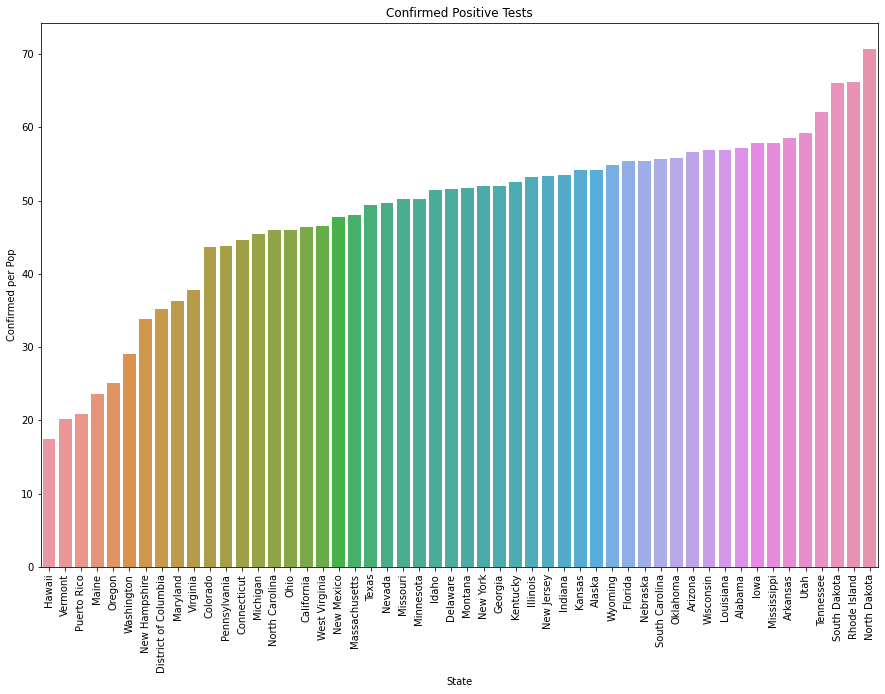

In [74]:
fig1=plt.figure(figsize=(15,10))
fig1=sns.barplot(x='State',y='Confirmed per Pop', data=Total_States.sort_values(by='Confirmed per Pop'))
fig1=plt.title('Confirmed Positive Tests')
fig1=plt.xticks(rotation=90)
plt.savefig('./figures/Cases_per_Pop.png')

The confirmed cases when summed is capturing those individuals who were tested multiple times during the course of a single infection, travelers who visited the state and people who contracted COVID multiple times.  It doesn't mean everyone in North Dekota caught COVID 70 times, just that there were that many official tests which came back positive.

looks like North Dakota and Rhode Island are having the roughest times.  Hawaii and Vermont are doing the best as far as case numbers go

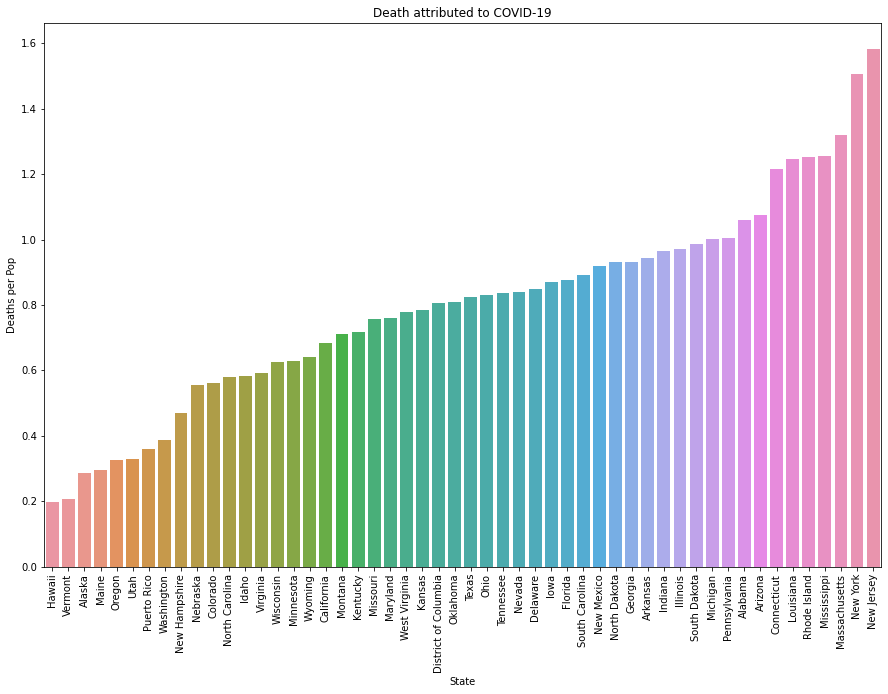

In [75]:
fig2=plt.figure(figsize=(15,10))
fig2=sns.barplot(x='State',y='Deaths per Pop', data=Total_States.sort_values(by='Deaths per Pop'))
fig2=plt.title('Death attributed to COVID-19')
gif2=plt.xticks(rotation=90)
plt.savefig('./figures/Deaths_per_Pop.png')

New Jersey and New York have had the roughest times of this.  Again Hawaii and Vermont are looking pretty good.

I'd love to try this with population density and make a graph that looks at things over time.

In [76]:
# I'm starting to like the panda's html parser.  It's making getting some data off a website very easy.
CA_Population_County = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca')
CA_Population_County

[                      Name  2022 Population Growth Since 2010  Density (mi²)
 0       Los Angeles County          9934710             1.13%        2448.12
 1         San Diego County          3351737             8.01%         796.77
 2            Orange County          3174849             5.30%        4014.74
 3         Riverside County          2544817            15.59%         353.13
 4    San Bernardino County          2220081             8.78%         110.69
 5       Santa Clara County          1914397             7.19%        1483.78
 6           Alameda County          1685048            11.37%        2279.89
 7        Sacramento County          1591994            12.00%        1649.84
 8      Contra Costa County          1162547            10.45%        1608.52
 9            Fresno County          1020554             9.50%         171.27
 10             Kern County           919534             9.34%         113.08
 11    San Francisco County           884108             9.76%  

In [77]:
Cal.rename(index=lambda s: s + ' County', inplace=True)

In [78]:
Cal

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alameda County,0,0,0,0,0,0,0,0,0,0,...,188451,188518,201500,204284,206736,210747,210751,214939,214939,214939
Alpine County,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,119,119,119,119
Amador County,0,0,0,0,0,0,0,0,0,0,...,6651,6651,6835,6859,6910,7008,7008,7064,7064,7064
Butte County,0,0,0,0,0,0,0,0,0,0,...,30209,30223,31355,31551,31763,32088,32091,32484,32484,32484
Calaveras County,0,0,0,0,0,0,0,0,0,0,...,5424,5426,5705,5754,5855,5936,5936,6006,6006,6006
Colusa County,0,0,0,0,0,0,0,0,0,0,...,3682,3682,3772,3791,3789,3824,3824,3840,3840,3840
Contra Costa County,0,0,0,0,0,0,0,0,0,0,...,146207,146257,154961,156689,158142,160239,160241,162809,162809,162809
Del Norte County,0,0,0,0,0,0,0,0,0,0,...,4155,4157,4272,4308,4328,4339,4339,4368,4368,4368
El Dorado County,0,0,0,0,0,0,0,0,0,0,...,22949,22963,23847,24102,24279,24525,24525,24845,24845,24845
Fresno County,0,0,0,0,0,0,0,0,0,0,...,182959,182992,190467,192746,194709,197313,197314,201080,201080,201080


In [ ]:
# Making a data frame to hopefully merge with the COVID numbers data frame.  I can compare numbers vs population or by demographic or what ever.  
# Population density may be really imporant here.

In [79]:
CA_Population_County= pd.DataFrame(CA_Population_County[0]).set_index('Name')
CA_Population_County

,2022 Population,Growth Since 2010,Density (mi²)
Name,,,
Los Angeles County,9934710,1.13%,2448.12
San Diego County,3351737,8.01%,796.77
Orange County,3174849,5.30%,4014.74
Riverside County,2544817,15.59%,353.13
San Bernardino County,2220081,8.78%,110.69
Santa Clara County,1914397,7.19%,1483.78
Alameda County,1685048,11.37%,2279.89
Sacramento County,1591994,12.00%,1649.84
Contra Costa County,1162547,10.45%,1608.52


In [80]:
CA_Sum=pd.DataFrame(Cal.sum(axis=1), columns=['Total Cases'])
CA_Sum

,Total Cases
Alameda County,44597298
Alpine County,39462
Amador County,1790025
Butte County,7457633
Calaveras County,1182736
Colusa County,1101249
Contra Costa County,35420267
Del Norte County,894503
El Dorado County,5506841
Fresno County,53944857


In [81]:
CA_cases_by_county = CA_Sum.join(CA_Population_County, how='outer')
CA_cases_by_county

,Total Cases,2022 Population,Growth Since 2010,Density (mi²)
Alameda County,44597298,1685048.0,11.37%,2279.89
Alpine County,39462,1249.0,7.58%,1.69
Amador County,1790025,40793.0,7.67%,68.61
Butte County,7457633,185727.0,-15.56%,113.49
Calaveras County,1182736,46526.0,2.33%,45.61
Colusa County,1101249,21934.0,2.32%,19.06
Contra Costa County,35420267,1162547.0,10.45%,1608.52
Del Norte County,894503,28028.0,-1.88%,27.85
El Dorado County,5506841,199134.0,9.94%,116.60
Fresno County,53944857,1020554.0,9.50%,171.27


In [82]:
CA_cases_by_county['Cases per pop']= (CA_cases_by_county['Total Cases']/CA_cases_by_county['2022 Population'])
CA_cases_by_county['Cases by Density (mi²)']= (CA_cases_by_county['Total Cases']/CA_cases_by_county['Density (mi²)'])

In [83]:
CA_cases_by_county

,Total Cases,2022 Population,Growth Since 2010,Density (mi²),Cases per pop,Cases by Density (mi²)
Alameda County,44597298,1685048.0,11.37%,2279.89,26.466485,1.956116e+04
Alpine County,39462,1249.0,7.58%,1.69,31.594876,2.335030e+04
Amador County,1790025,40793.0,7.67%,68.61,43.880690,2.608986e+04
Butte County,7457633,185727.0,-15.56%,113.49,40.153736,6.571181e+04
Calaveras County,1182736,46526.0,2.33%,45.61,25.420969,2.593151e+04
Colusa County,1101249,21934.0,2.32%,19.06,50.207395,5.777802e+04
Contra Costa County,35420267,1162547.0,10.45%,1608.52,30.467815,2.202041e+04
Del Norte County,894503,28028.0,-1.88%,27.85,31.914621,3.211860e+04
El Dorado County,5506841,199134.0,9.94%,116.60,27.653947,4.722848e+04
Fresno County,53944857,1020554.0,9.50%,171.27,52.858405,3.149697e+05


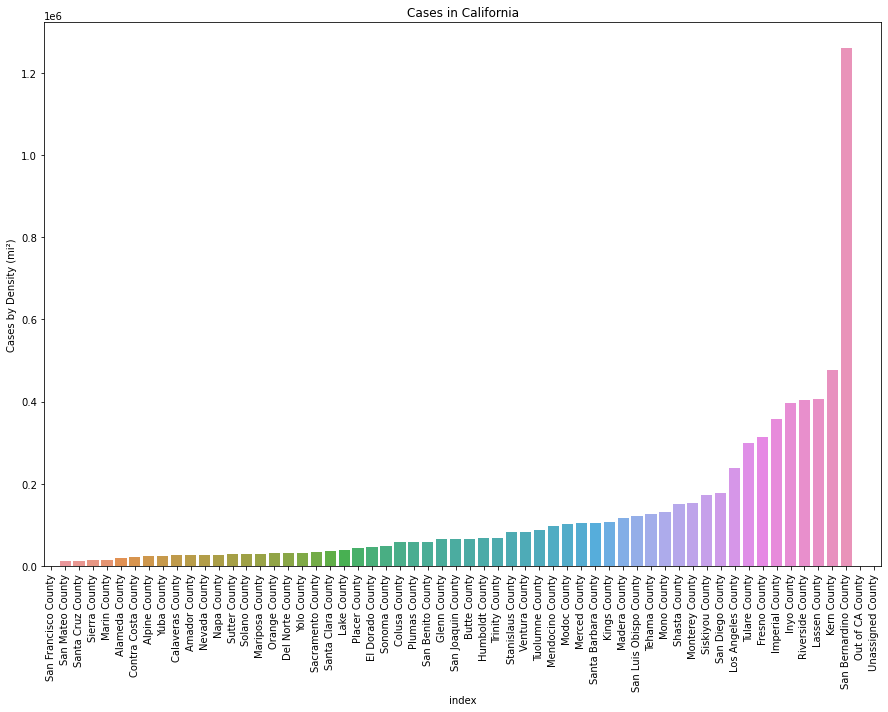

In [170]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='Cases by Density (mi²)', data=CA_cases_by_county.reset_index().sort_values(by='Cases by Density (mi²)'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.show()

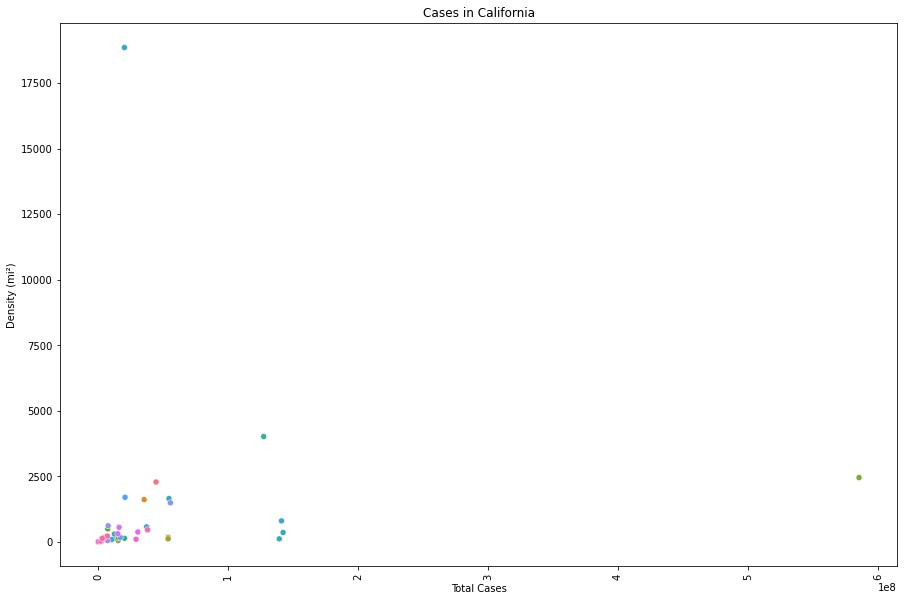

In [172]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Cases',y='Density (mi²)', data=CA_cases_by_county.reset_index(), hue='index', legend=False)
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.show()

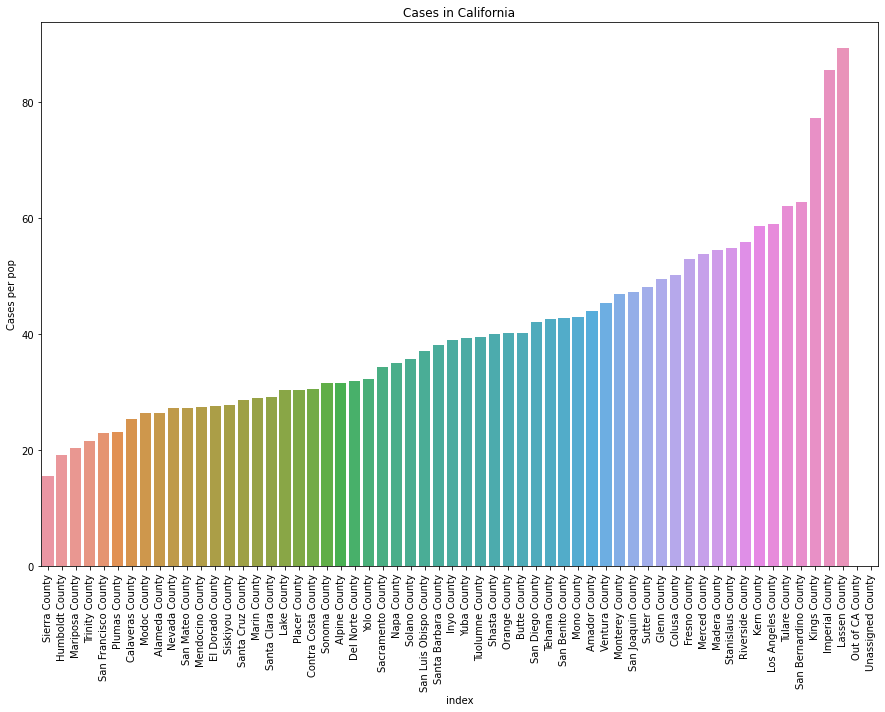

In [174]:
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='Cases per pop', data=CA_cases_by_county.reset_index().sort_values(by='Cases per pop'))
plt.title('Cases in California')
plt.xticks(rotation=90)
plt.show()

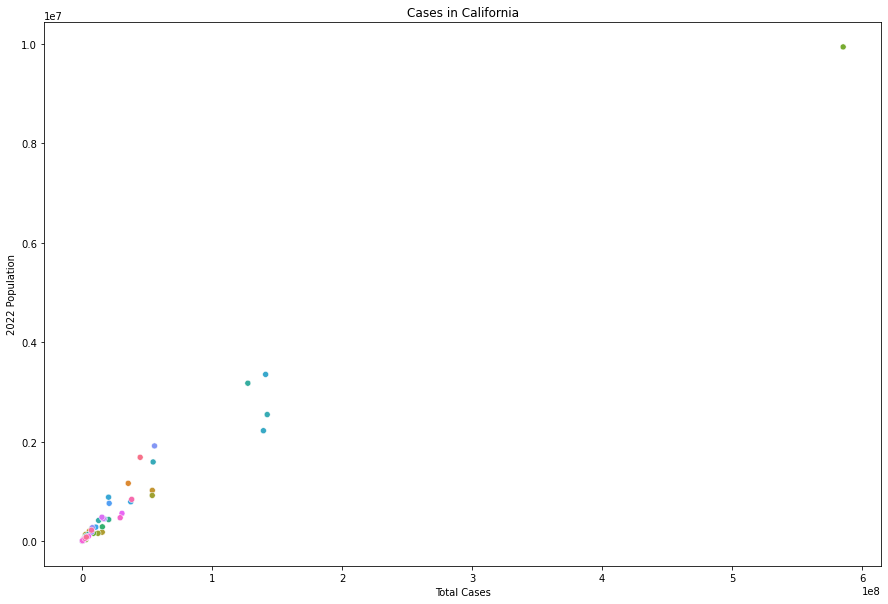

In [175]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Cases',y='2022 Population', data=CA_cases_by_county.reset_index(), hue='index', legend=False)
plt.title('Cases in California')
plt.show()

Looks like there is a linear relationship here

In [ ]:
# Next step is to generate some statistics about which states had the worst and best covid numbers and when
# Also I could try some time series data analytics to try to parse out the trends and changes.  Doesn't quite look like we have seasonability, 
# But we do have trends based on time.  Taking the difference could provide usefull insights.

In [ ]:
date=Cal_deaths2['Date']
date=date.iloc[100:]
dif=Cal_deaths2['Deaths'].diff()
dif=dif.iloc[100:]
plt.figure(figsize=(30,20))
plt.bar(date,dif)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Cal_deaths2.set_index('Date', inplace=True)
deaths=Cal_deaths2['Deaths'].diff().dropna()
plt.figure(figsize=(15,10))
deaths['2021'].plot(kind='line')

In [ ]:
Flor_deaths2.set_index('Date', inplace=True)
deaths=Flor_deaths2['Deaths'].diff().dropna()
plt.figure(figsize=(15,10))
deaths['2021'].plot(kind='line')

In [ ]:
F_deaths=Flor_deaths2['Deaths'].diff().dropna()
C_deaths=Cal_deaths2['Deaths'].diff().dropna()
plt.figure(figsize=(15,10))
F_deaths['2021'].plot(kind='line', alpha=0.5)
C_deaths['2021'].plot(kind='line', alpha=0.5)
plt.legend(['Florida','California'])
plt.show()

A bit of a back and forth for who has the most differences in their deaths.  I should remember to scale this to population so it's not missrepresented.

In [ ]:
plt.figure(figsize=(15,10))
F_deaths['2022'].plot(kind='line', alpha=0.5)
C_deaths['2022'].plot(kind='line', alpha=0.5)
plt.yscale('log')
plt.legend(['Florida','California'])
plt.show()

One bad day and I can't see the data.  Need to rescale.  Logrithmic? (now I can't see the big negative spike from Florida)

It's strange that Florida's data seems more sparse than California's